# Multi-class classification problem using logistic regression

## load the data
we will use [this dataset from kaggle](https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification)

**About this dataset**

This database contains 34 attributes, 33 of which are linear valued and one of them is nominal.
The class attribute is the last column
Number of Instances: 366, Number of Attributes: 34
Missing Attribute Values: 8 (in Age attribute). Distinguished with '?'.

**Attribute Information:**

Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)
- 1: erythema
- 2: scaling
- 3: definite borders
- 4: itching
- 5: koebner phenomenon
- 6: polygonal papules
- 7: follicular papules
- 8: oral mucosal involvement
- 9: knee and elbow involvement
- 10: scalp involvement
- 11: family history, (0 or 1)
- 34: Age (linear)

- Histopathological Attributes: (take values 0, 1, 2, 3)
- 12: melanin incontinence
- 13: eosinophils in the infiltrate
- 14: PNL infiltrate
- 15: fibrosis of the papillary dermis
- 16: exocytosis
- 17: acanthosis
- 18: hyperkeratosis
- 19: parakeratosis
- 20: clubbing of the rete ridges
- 21: elongation of the rete ridges
- 22: thinning of the suprapapillary epidermis
- 23: spongiform pustule
- 24: munro microabcess
- 25: focal hypergranulosis
- 26: disappearance of the granular layer
- 27: vacuolisation and damage of basal layer
- 28: spongiosis
- 29: saw-tooth appearance of retes
- 30: follicular horn plug
- 31: perifollicular parakeratosis
- 32: inflammatory monoluclear inflitrate
- 33: band-like infiltrate

In [1]:
%%capture
%pip install fasteda
%pip install dabl

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [12]:
data = pd.read_csv("./dermatology_database_1.csv")
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


## EDA 

DataFrame Head:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3


DataFrame Tail:


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(366, 35)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    i

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
erythema,366,2.068,2,0.665,0,2,2,2,3,-0.300434,0.028509
scaling,366,1.795,2,0.702,0,1,2,2,3,-0.074868,-0.307527
definite_borders,366,1.549,2,0.908,0,1,2,2,3,-0.289590,-0.735896
itching,366,1.366,1,1.138,0,0,1,2,3,0.097802,-1.412679
koebner_phenomenon,366,0.634,0,0.908,0,0,0,1,3,1.181827,0.191367
polygonal_papules,366,0.448,0,0.957,0,0,0,0,3,1.799235,1.562579
follicular_papules,366,0.167,0,0.571,0,0,0,0,3,3.542772,11.850758
oral_mucosal_involvement,366,0.377,0,0.834,0,0,0,0,3,1.952703,2.305201
knee_and_elbow_involvement,366,0.615,0,0.983,0,0,0,1,3,1.229140,-0.008582
scalp_involvement,366,0.519,0,0.906,0,0,0,1,3,1.449955,0.659936


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



c:\Users\medab\anaconda3\lib\site-packages\fasteda\__init__.py:133: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = False, cmap = "Spectral")


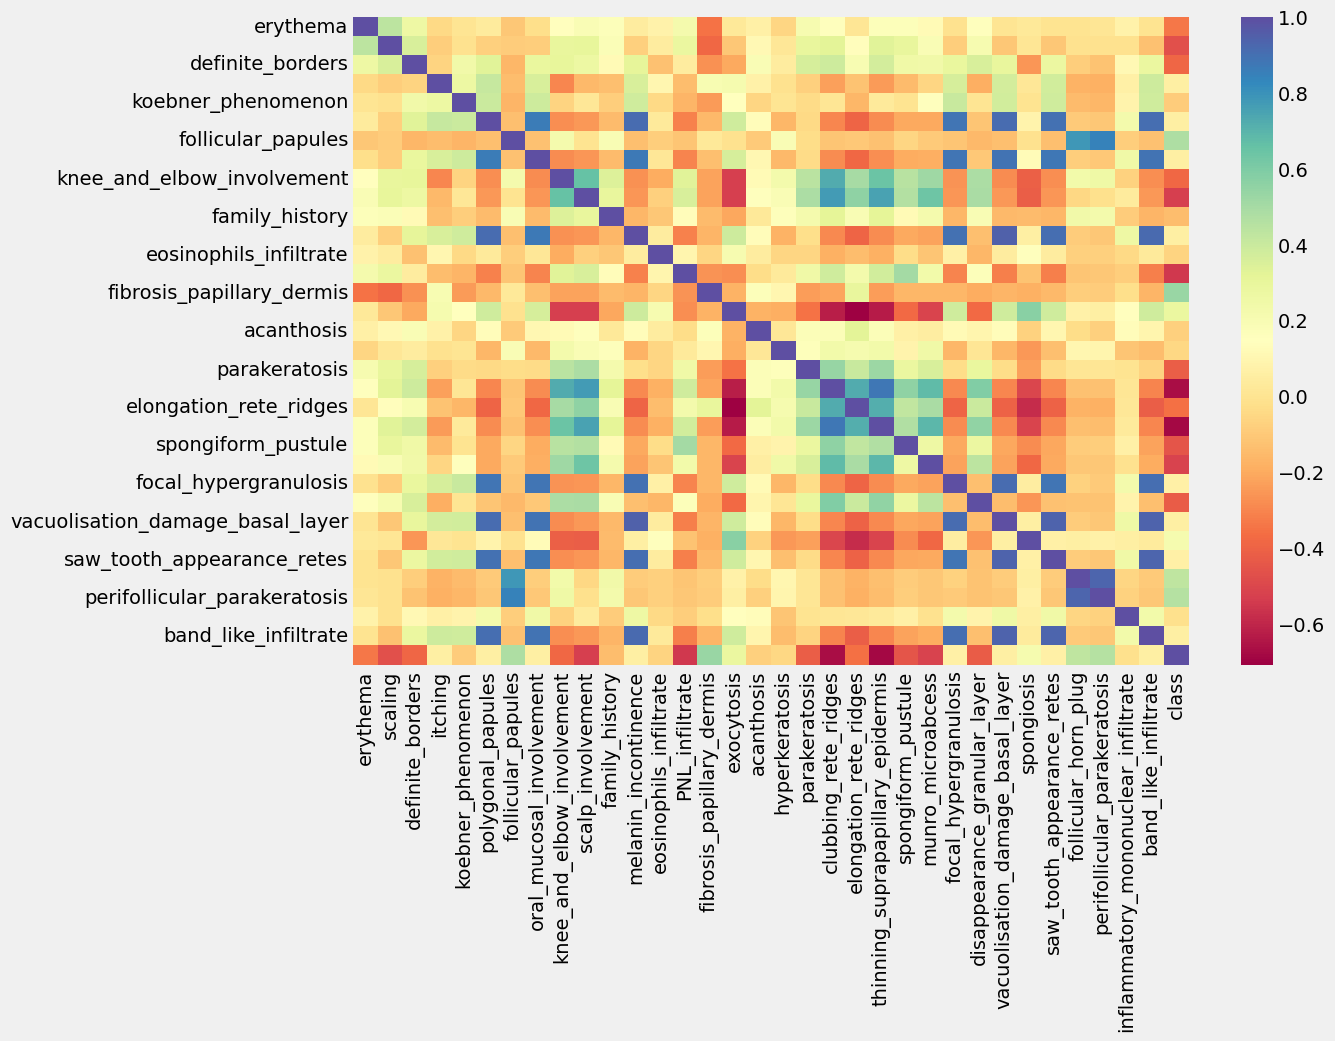

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):

----------------------------------------------------------------------------------------------------
Countplot(s):



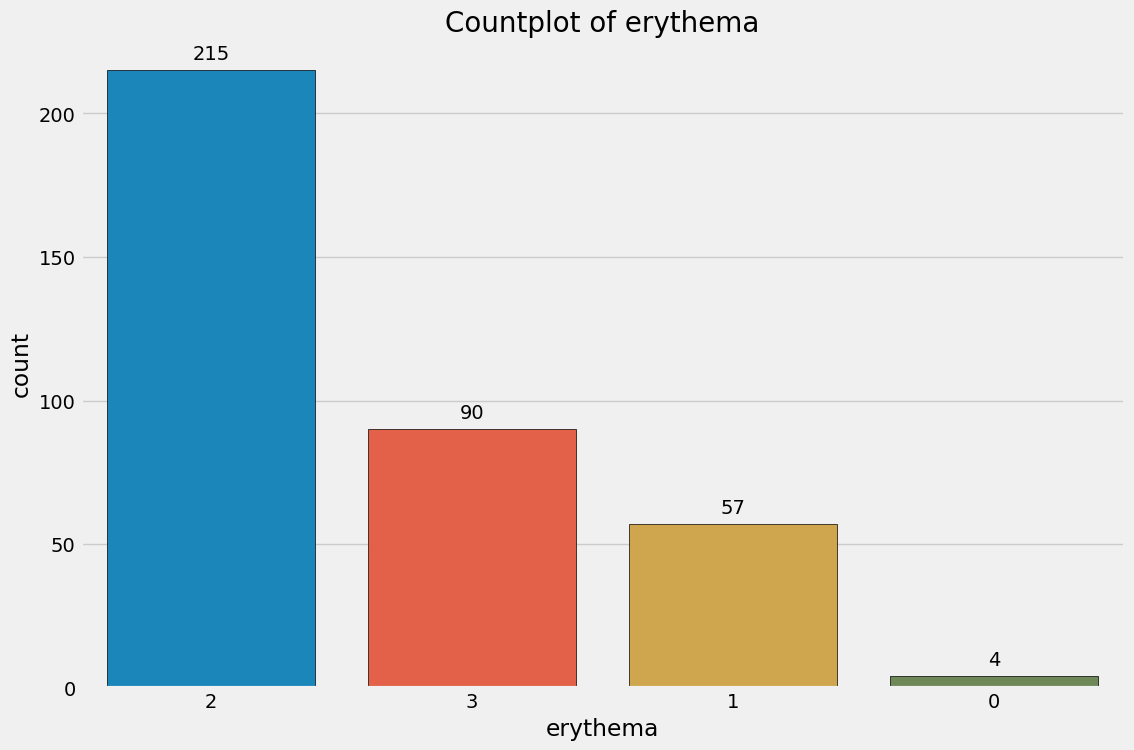

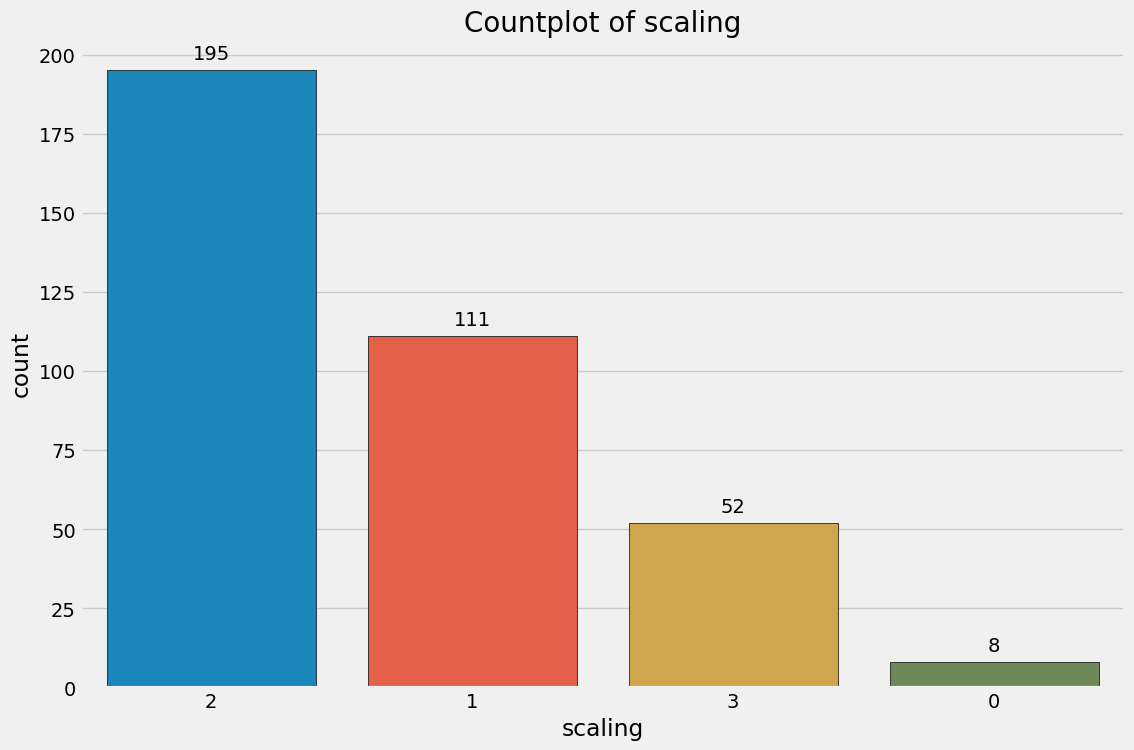

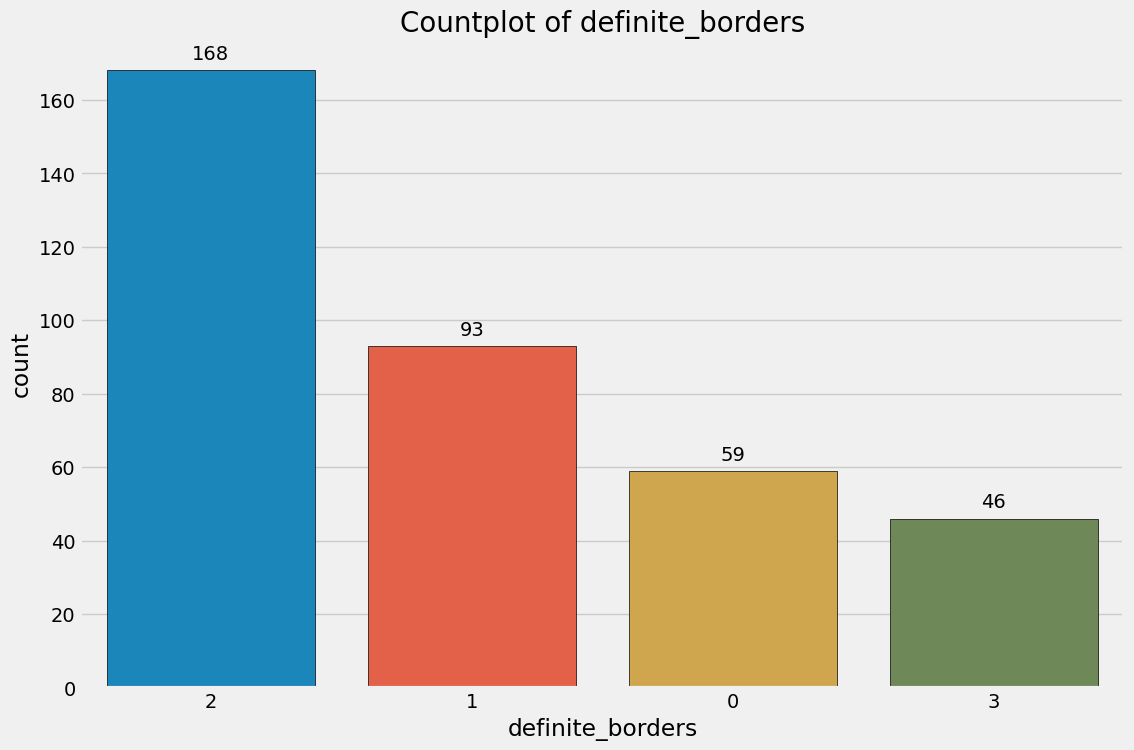

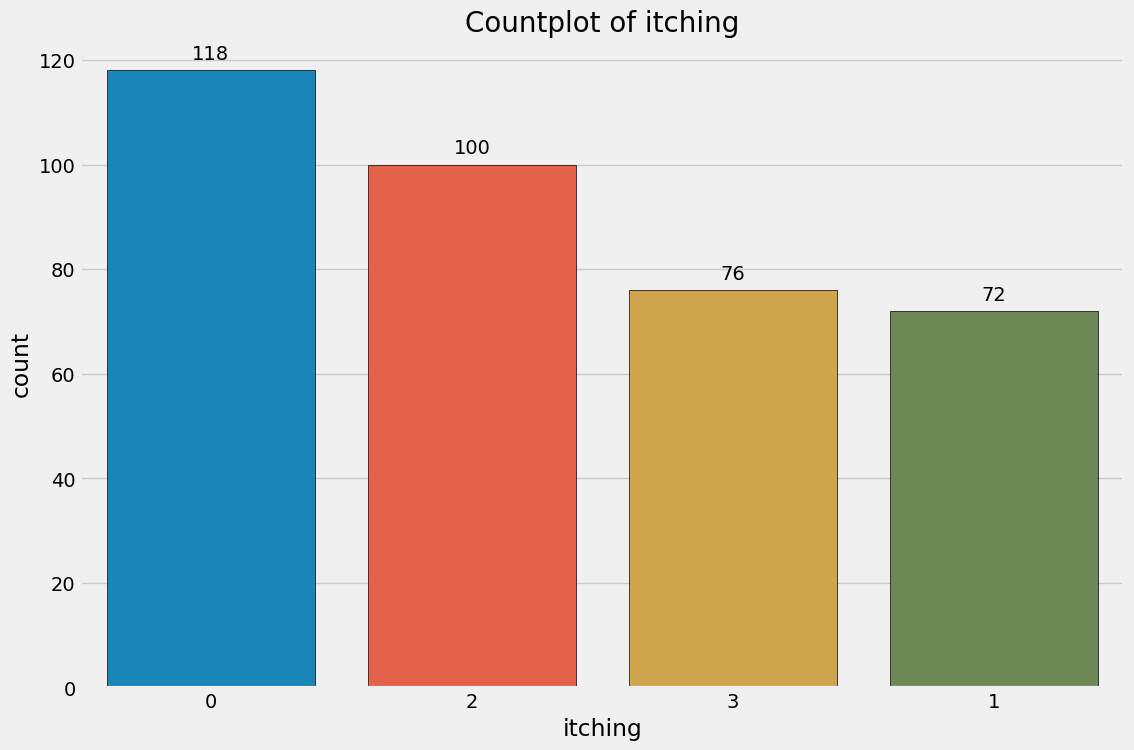

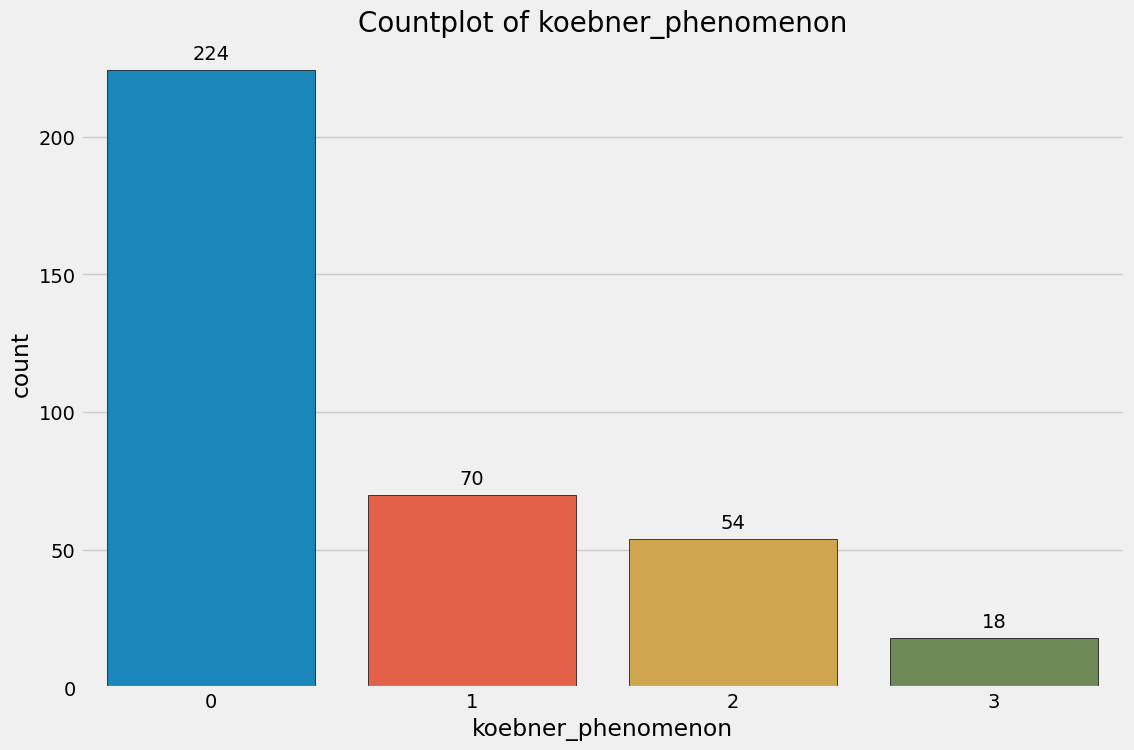

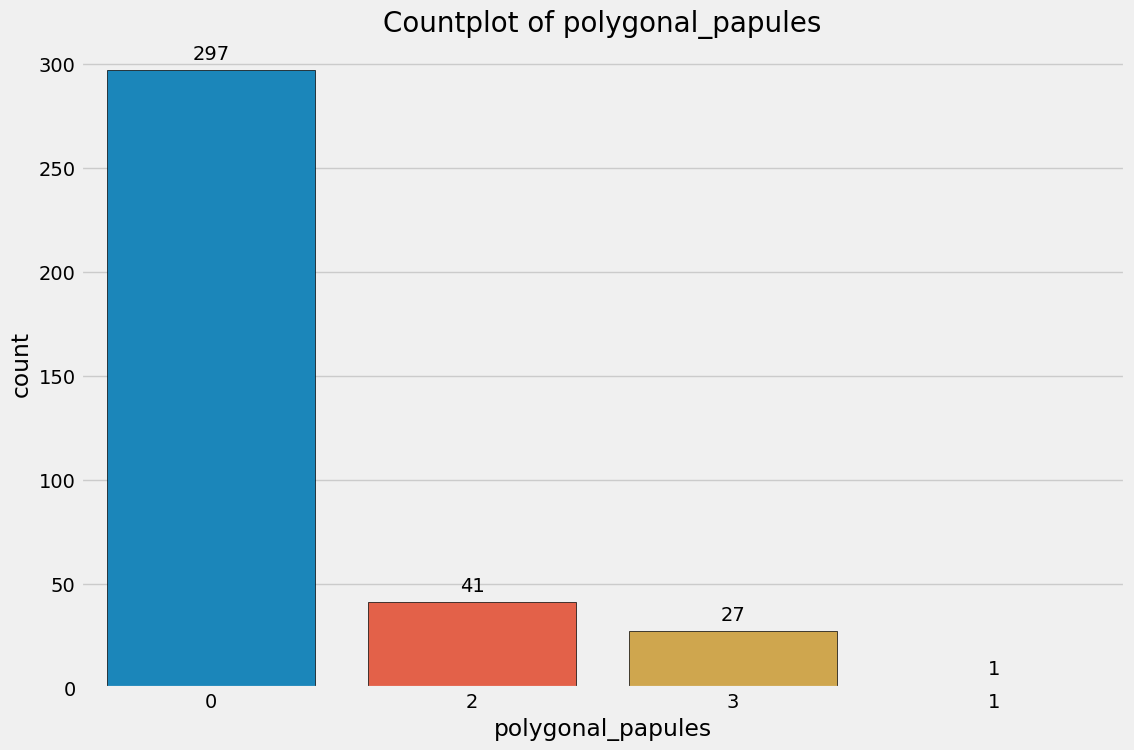

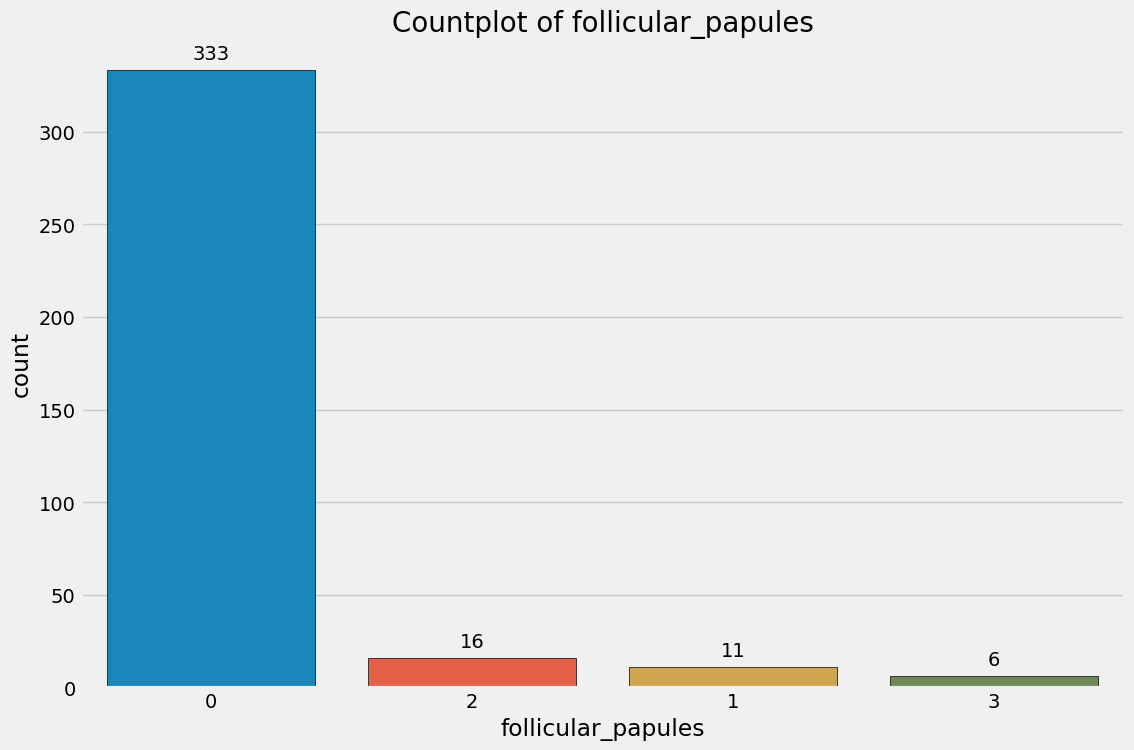

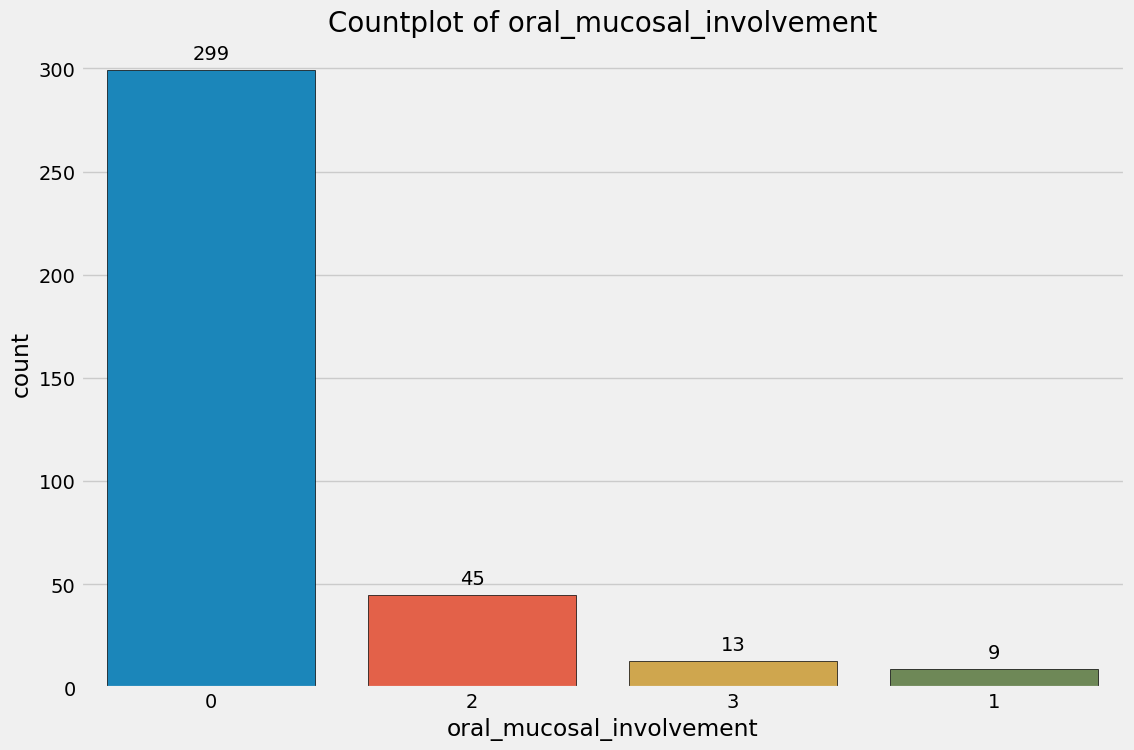

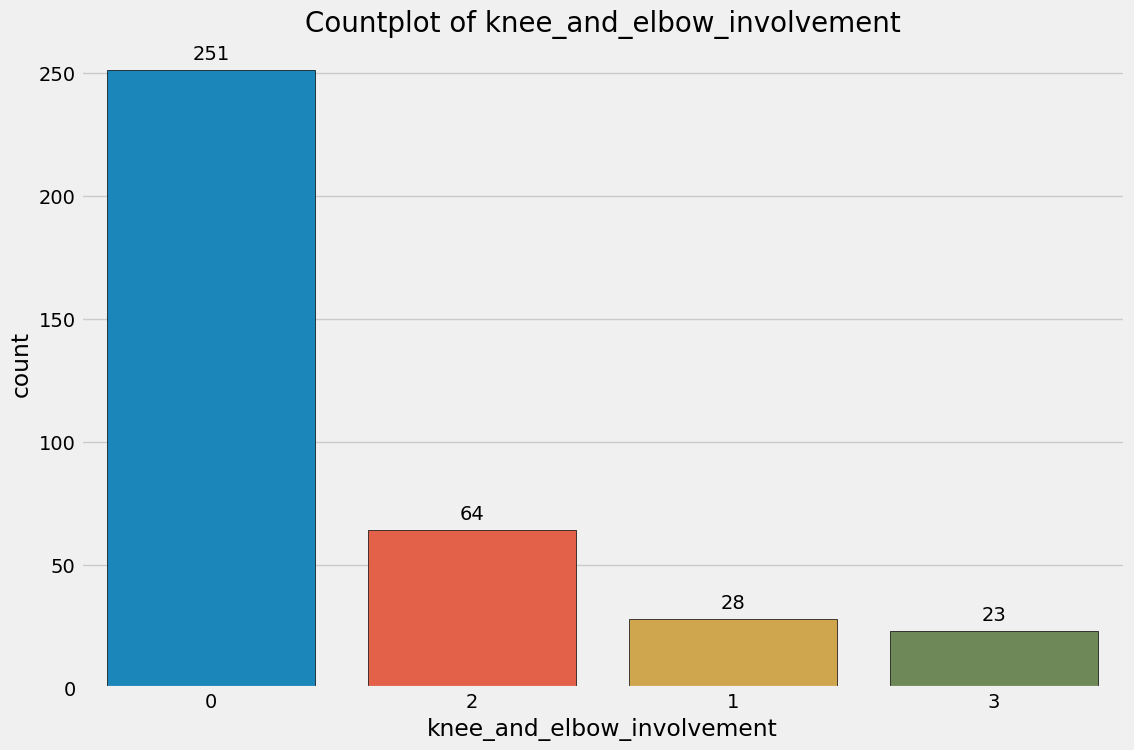

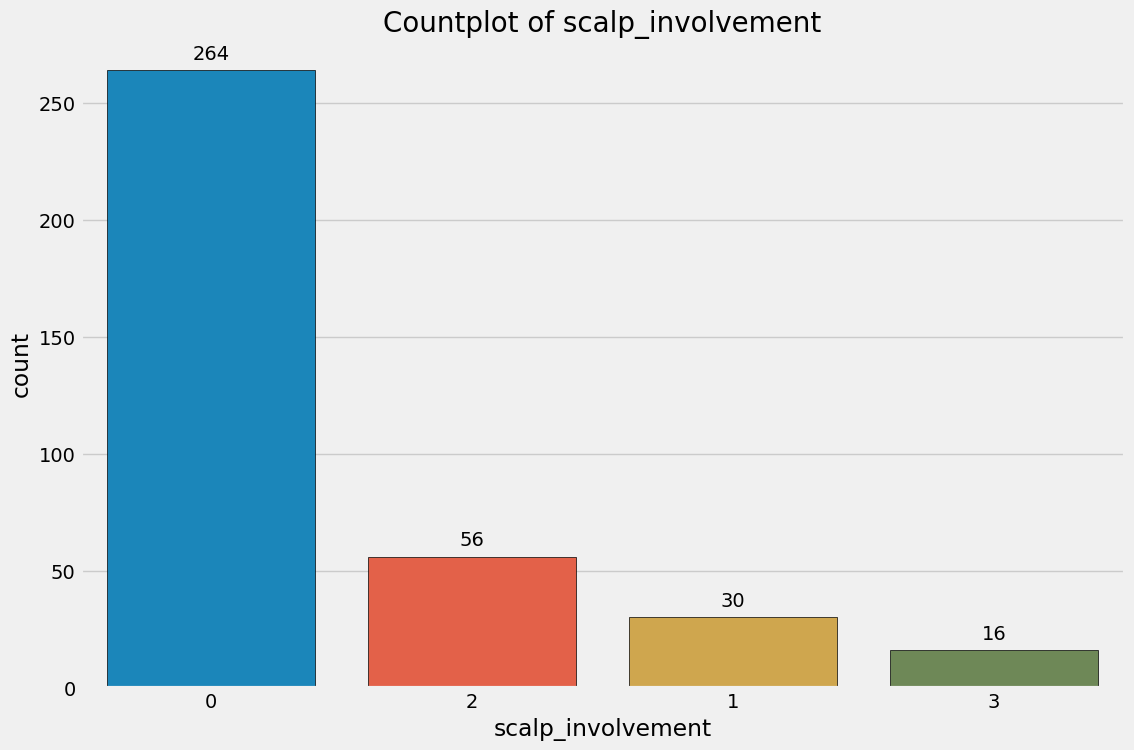

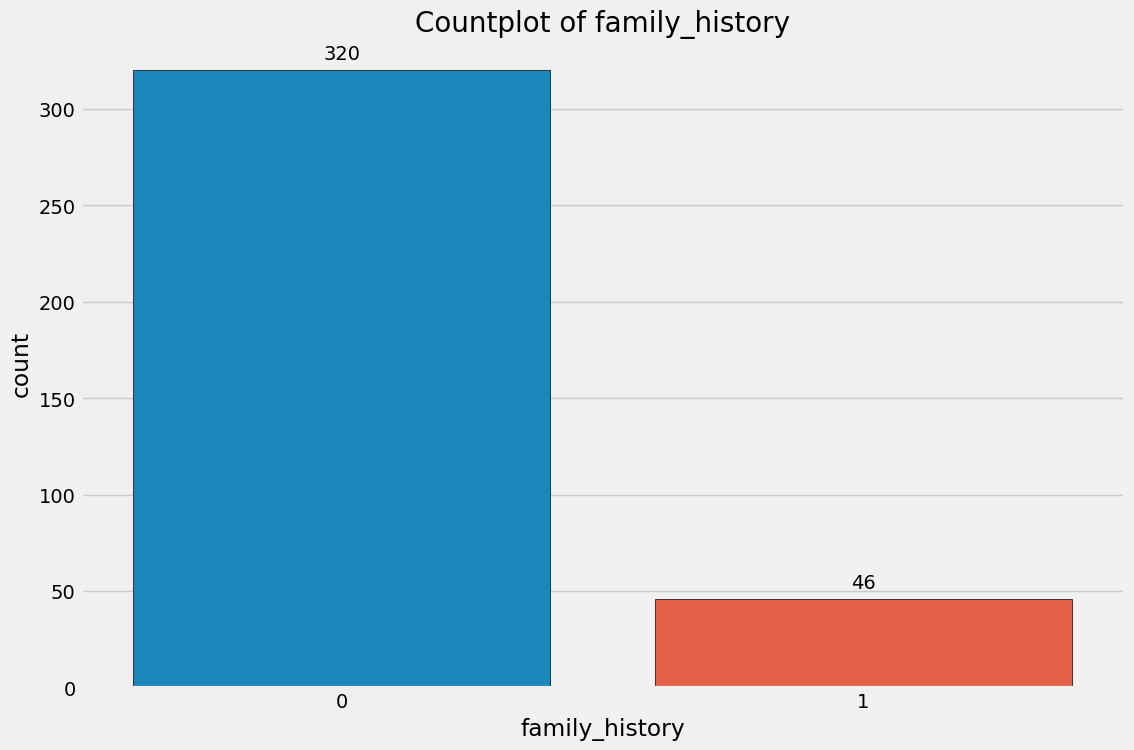

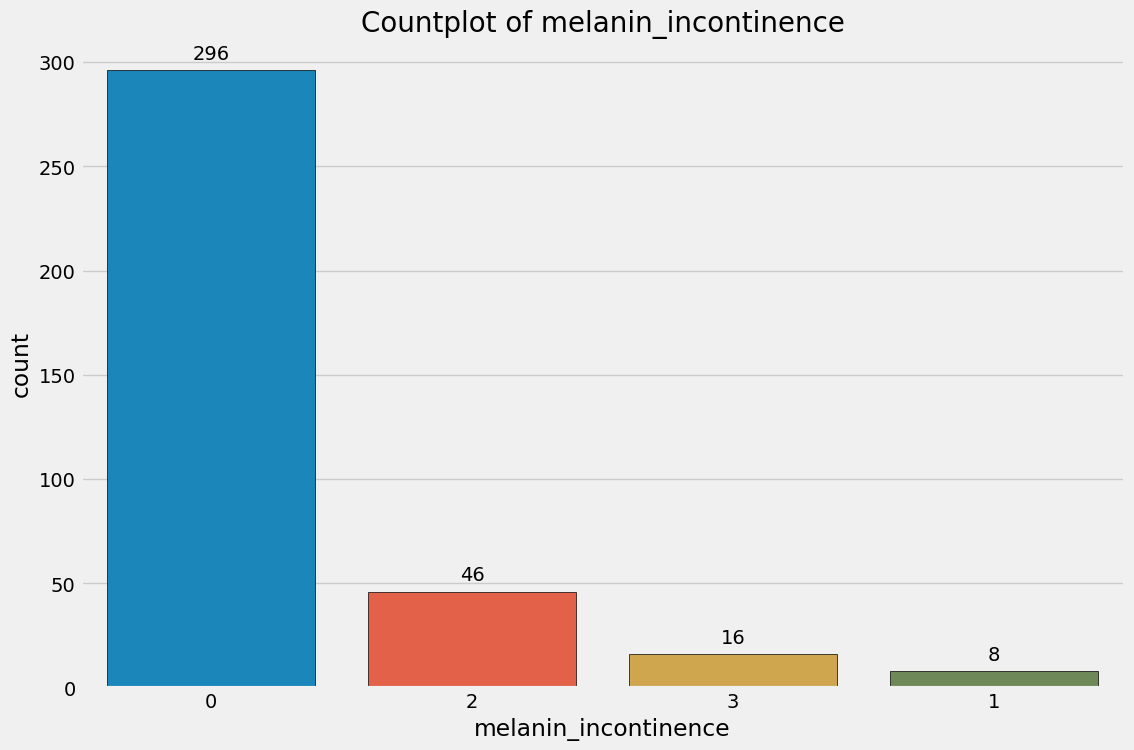

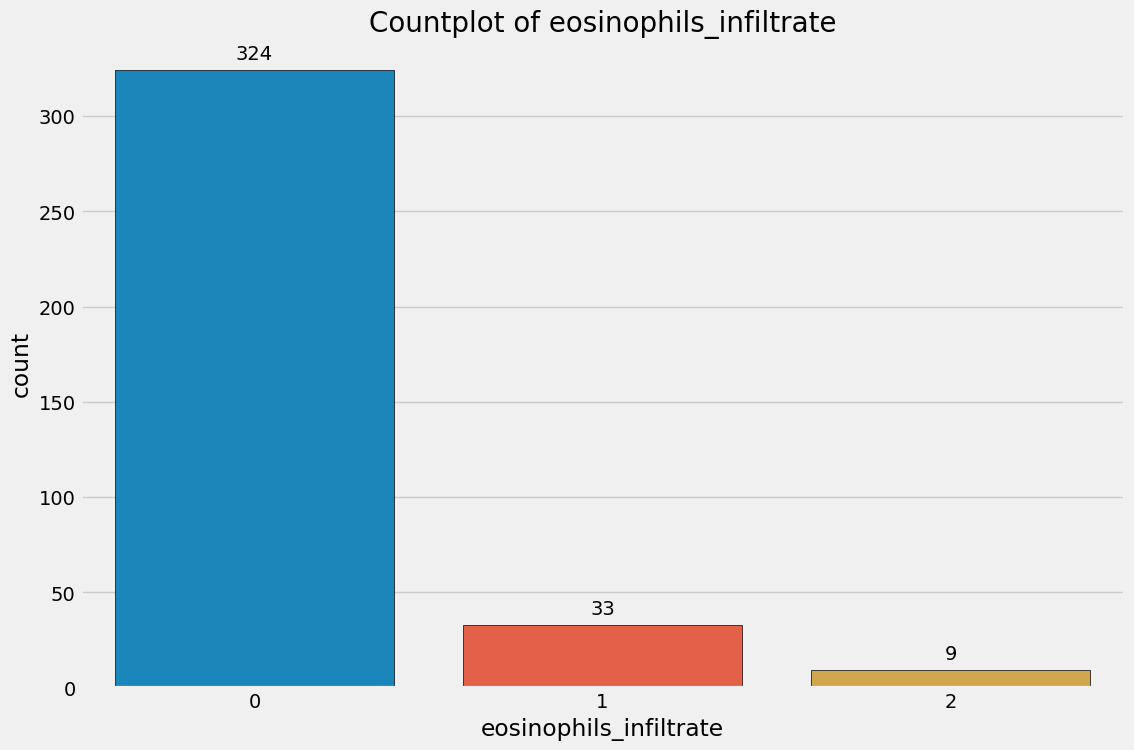

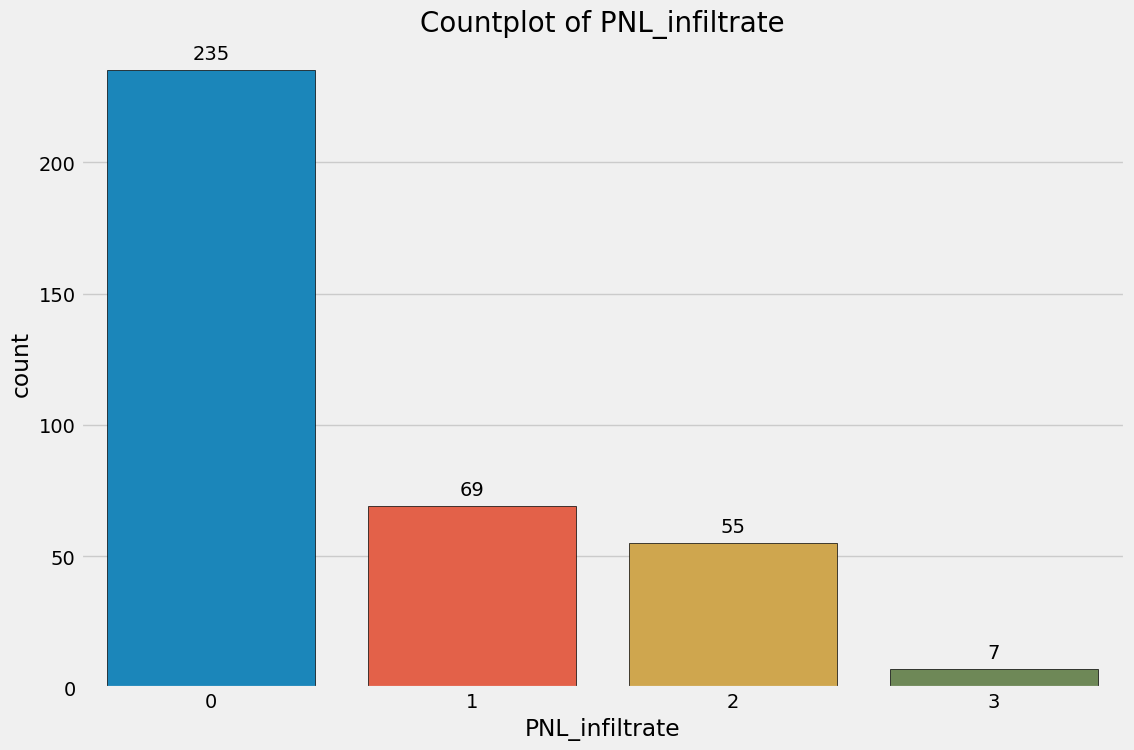

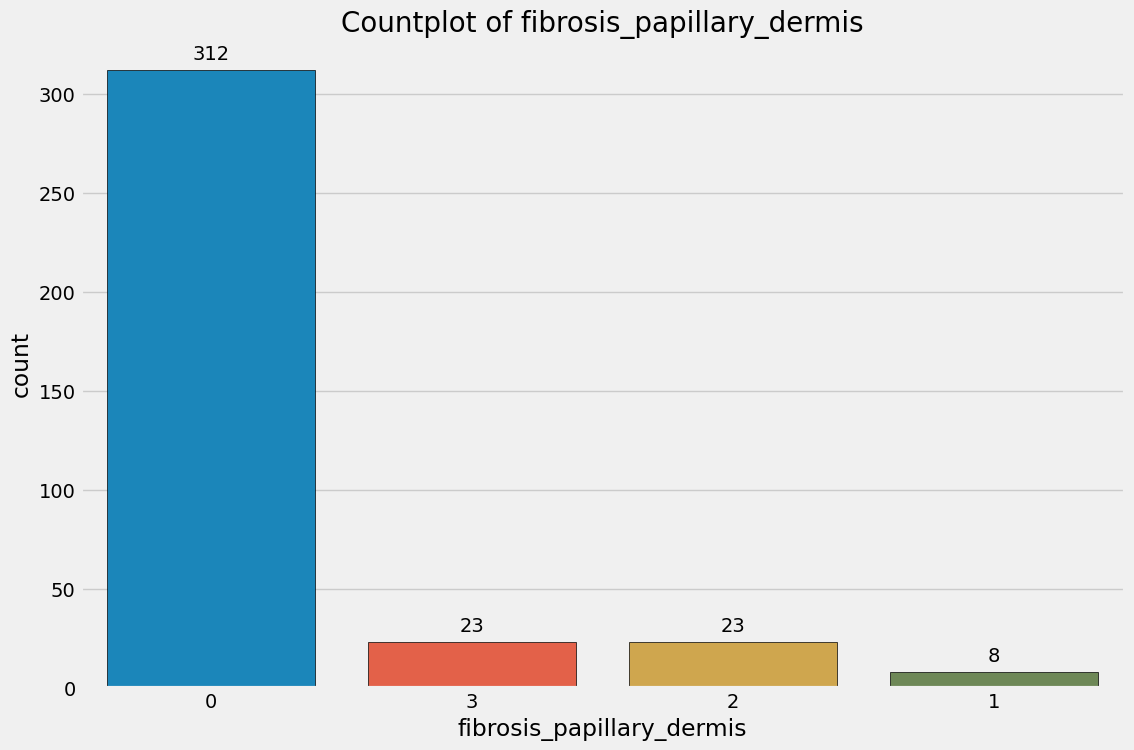

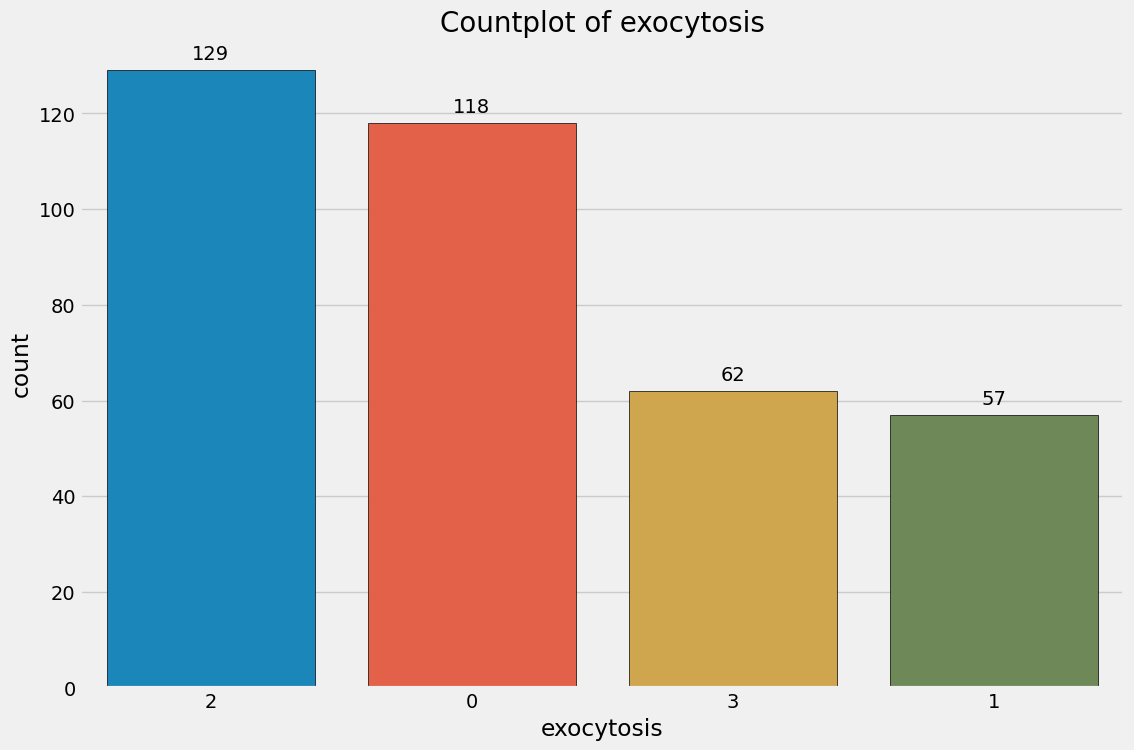

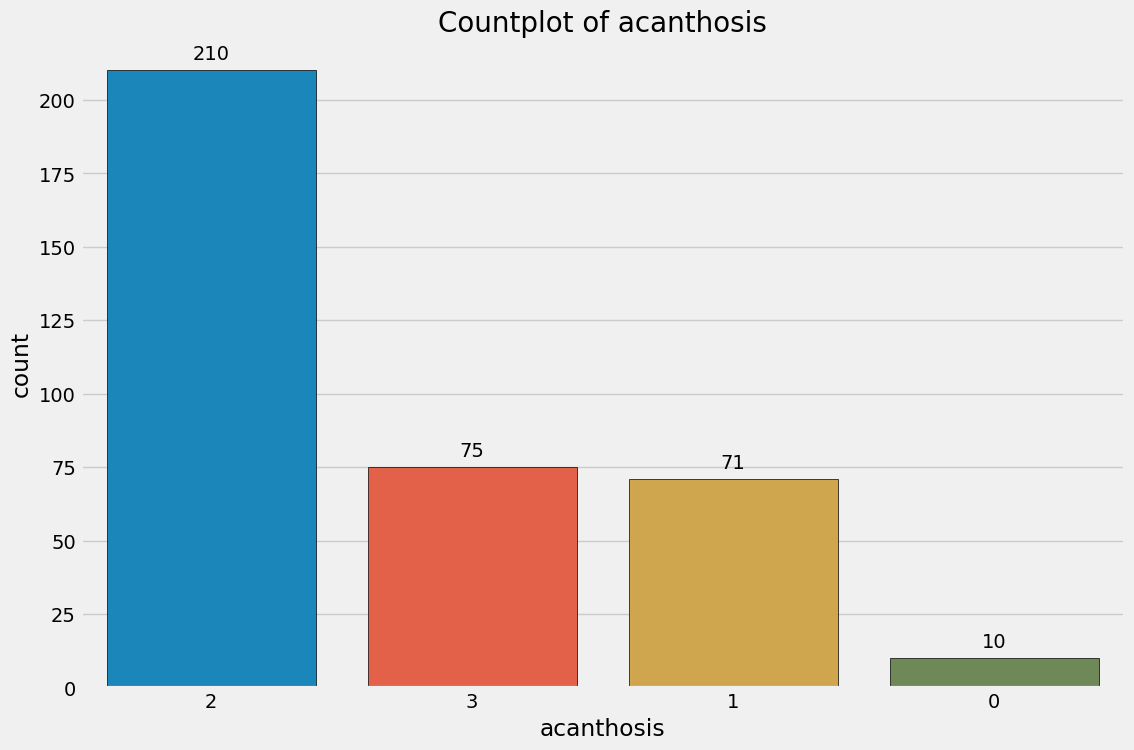

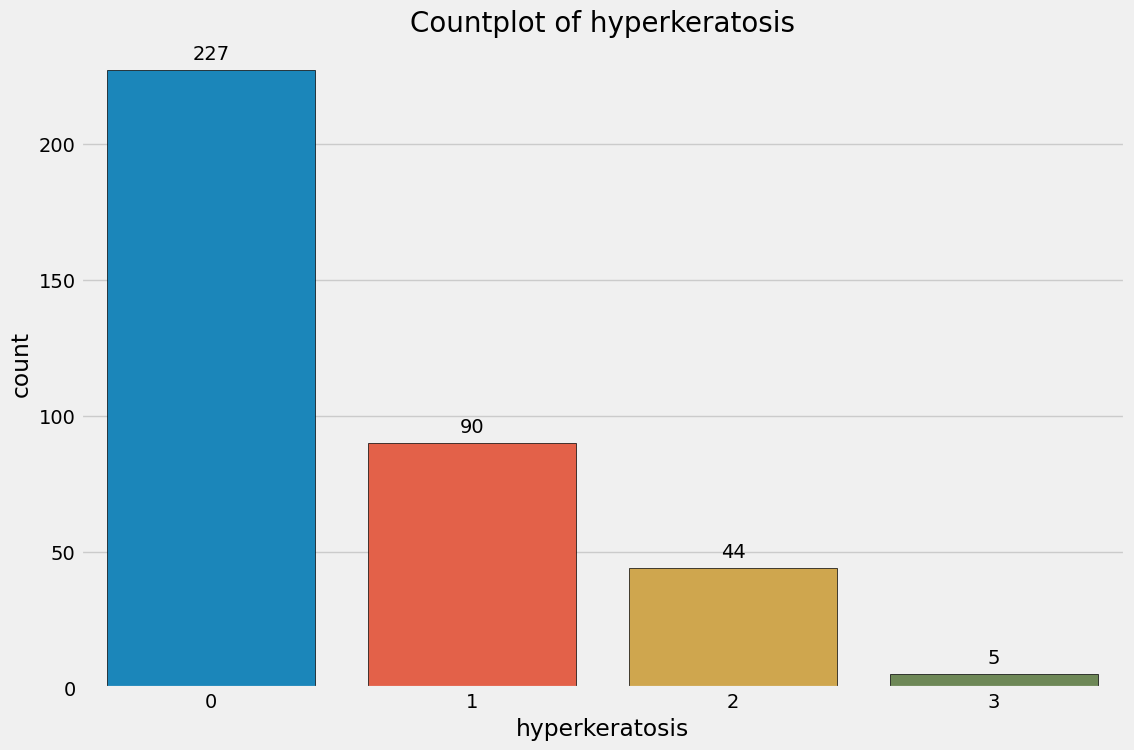

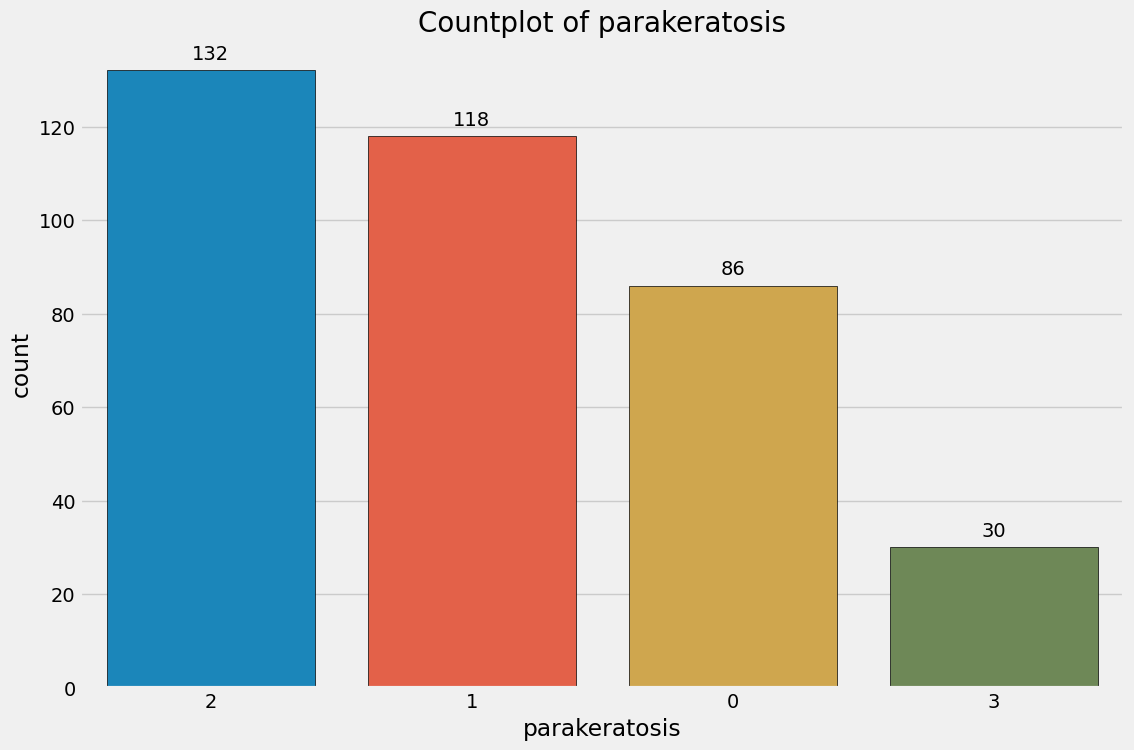

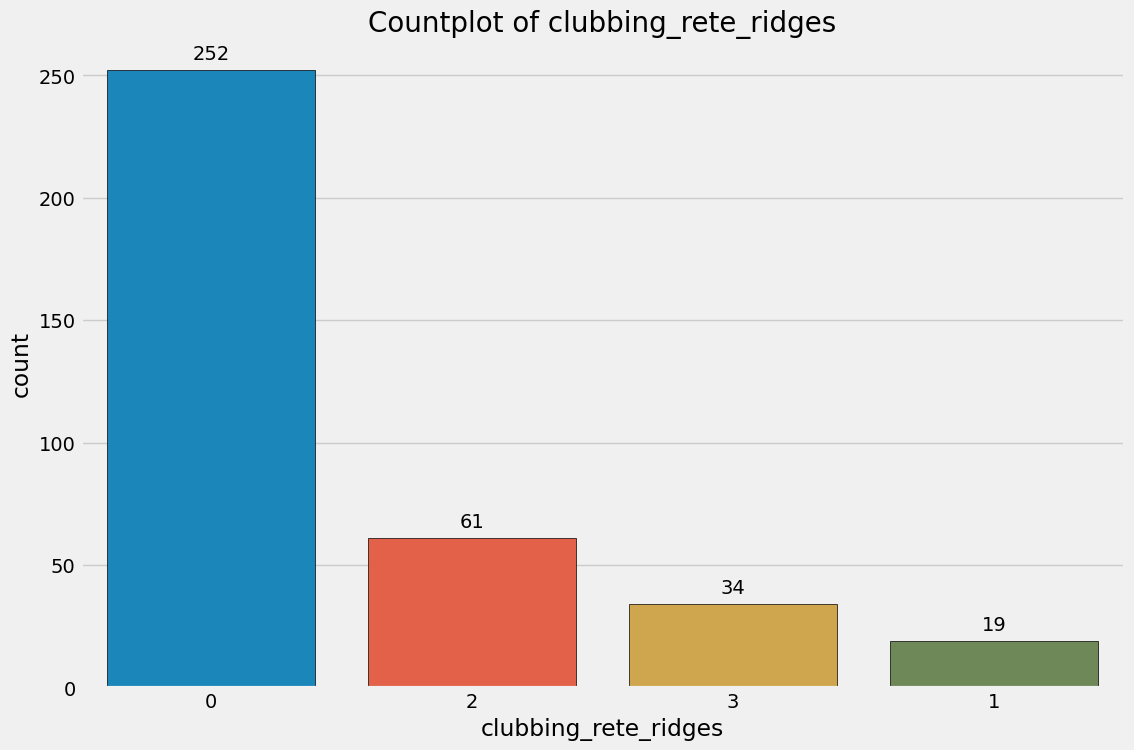

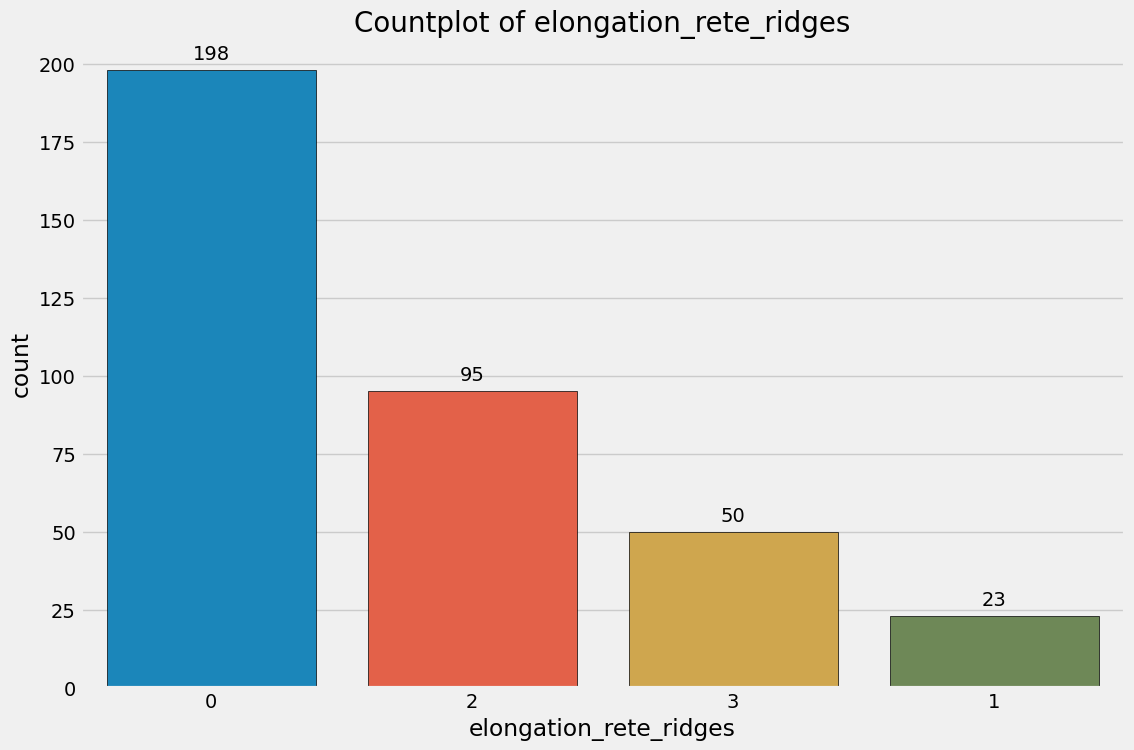

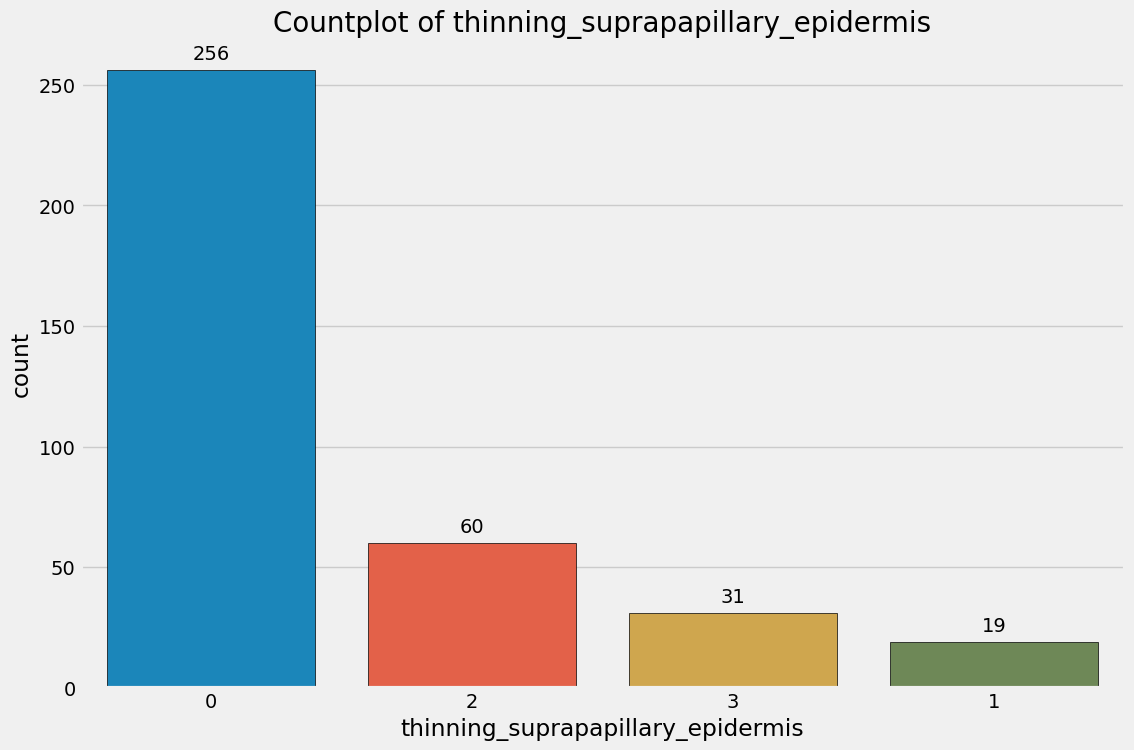

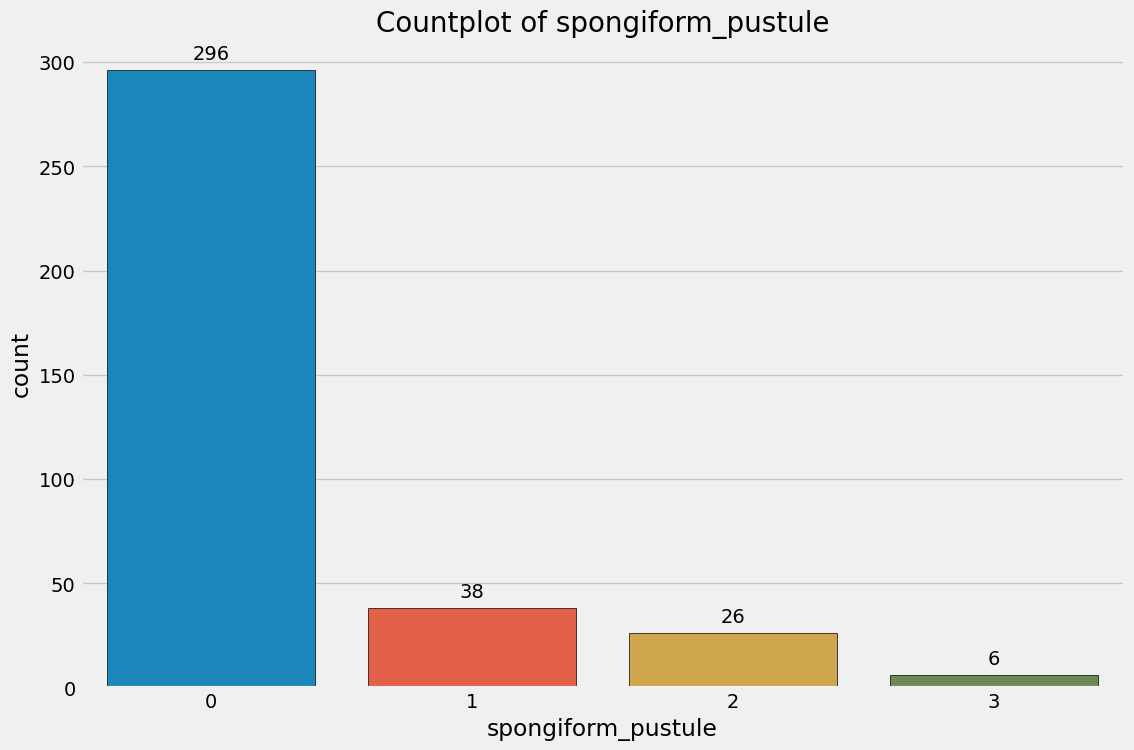

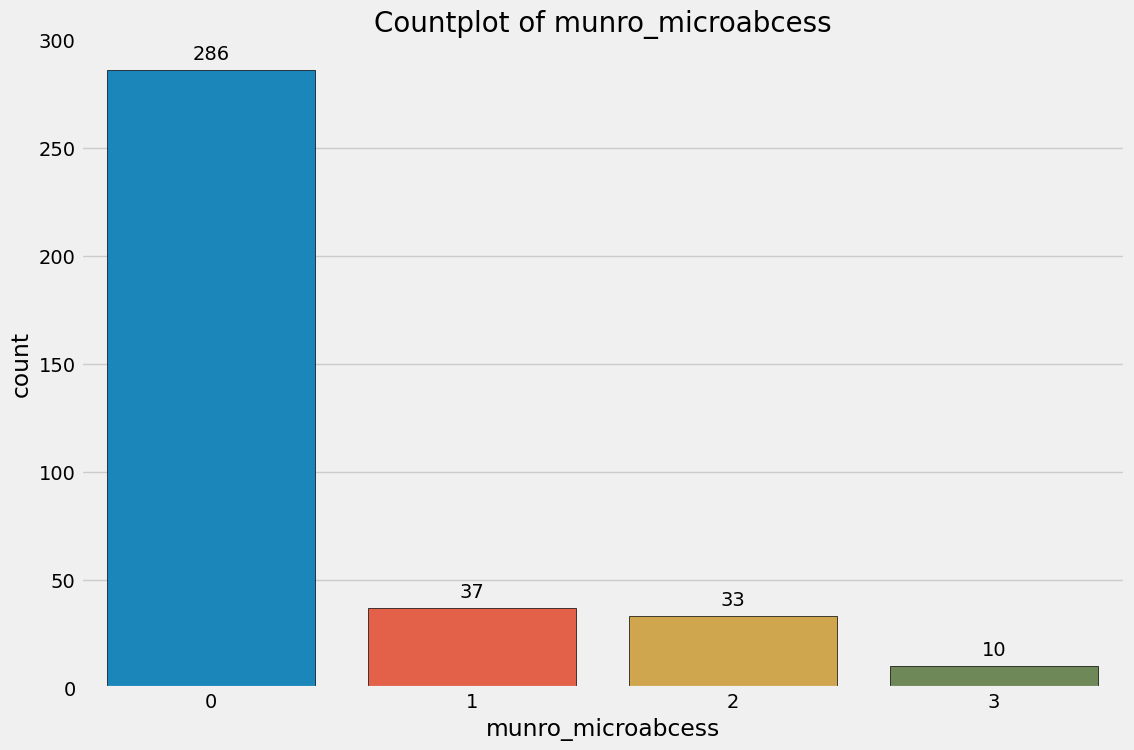

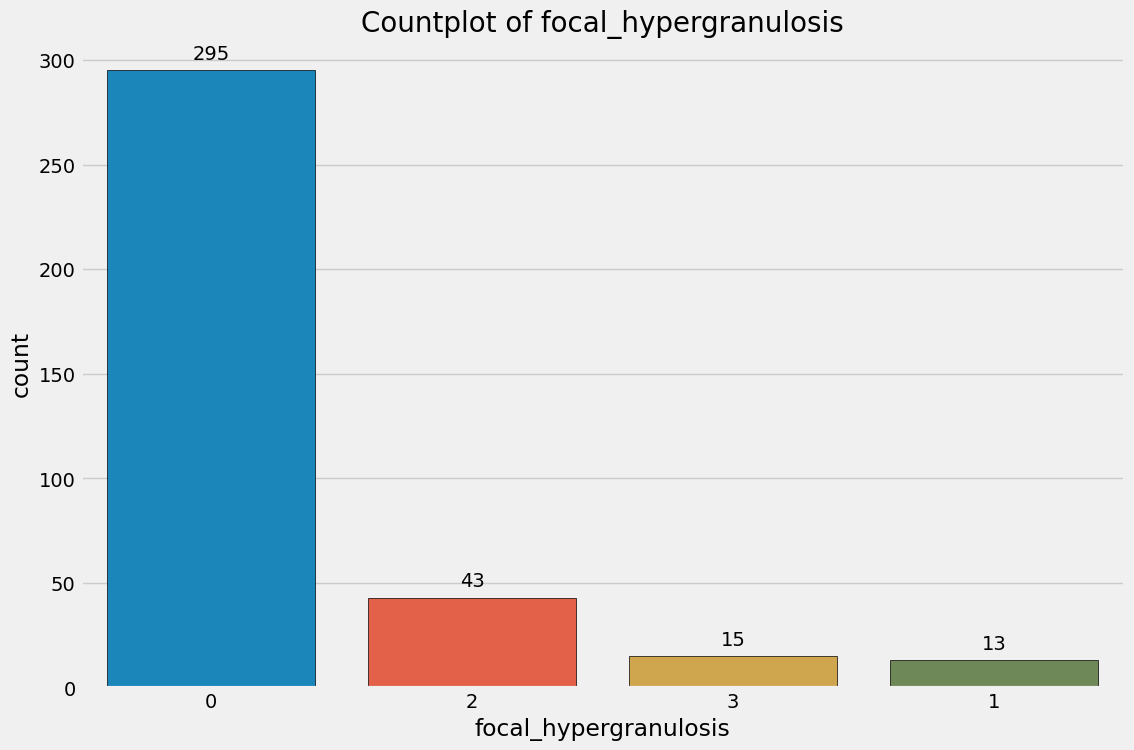

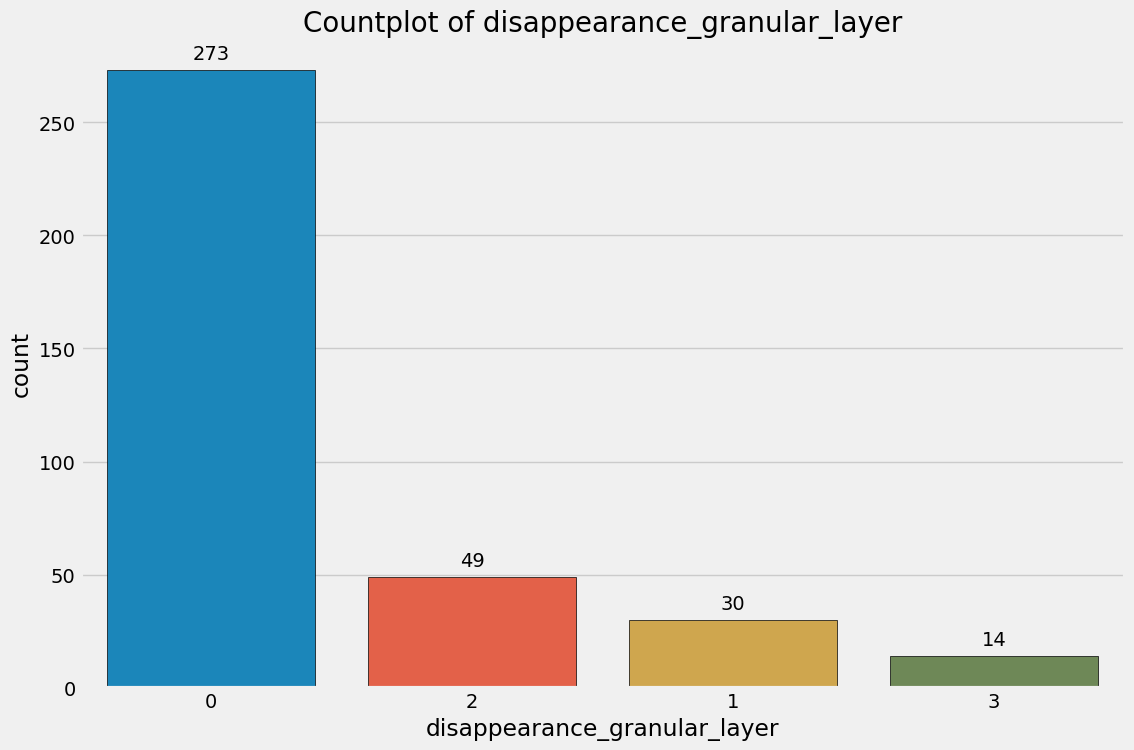

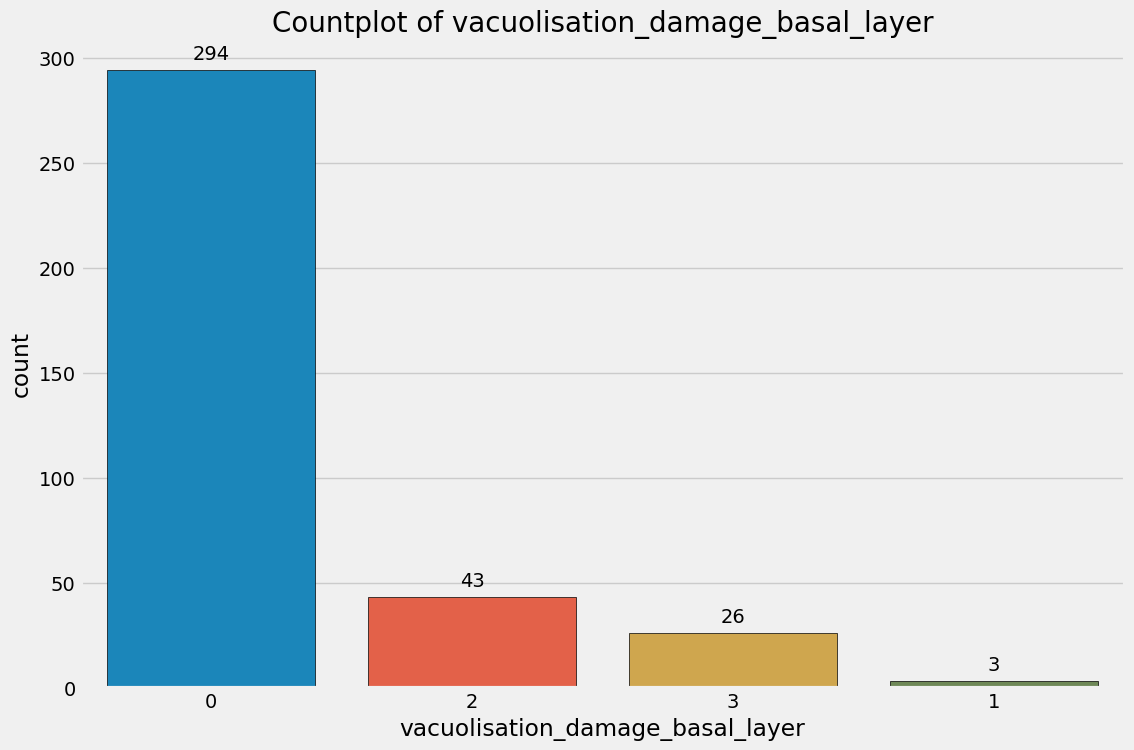

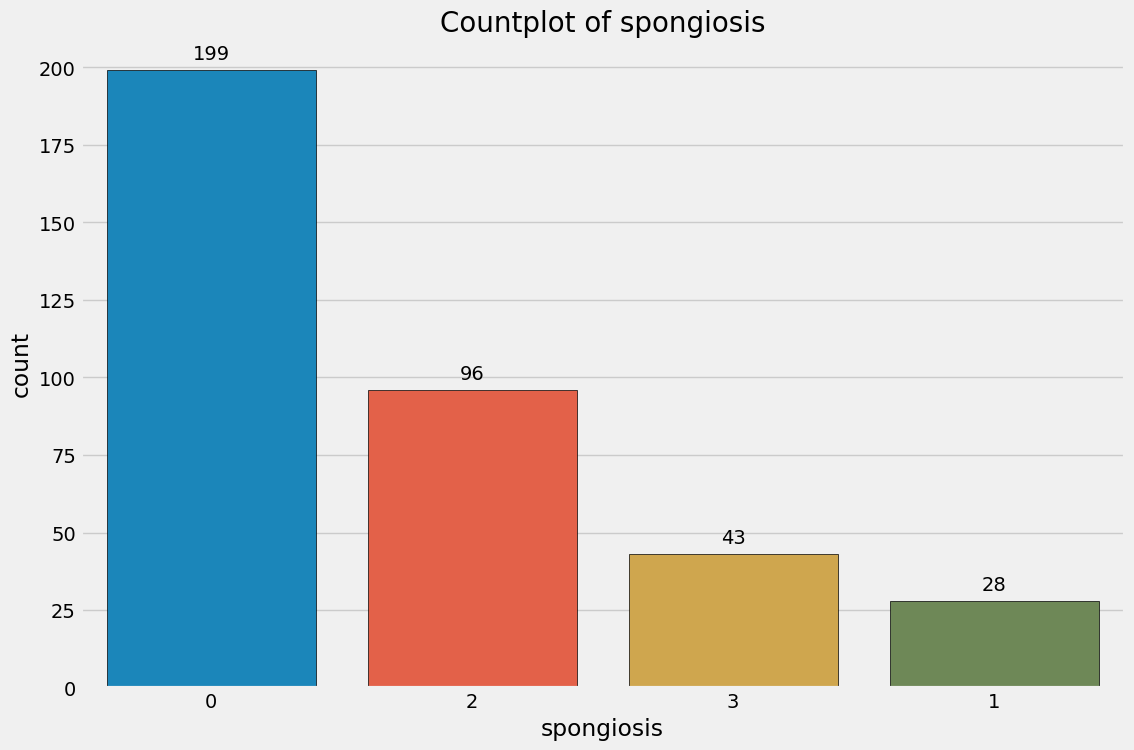

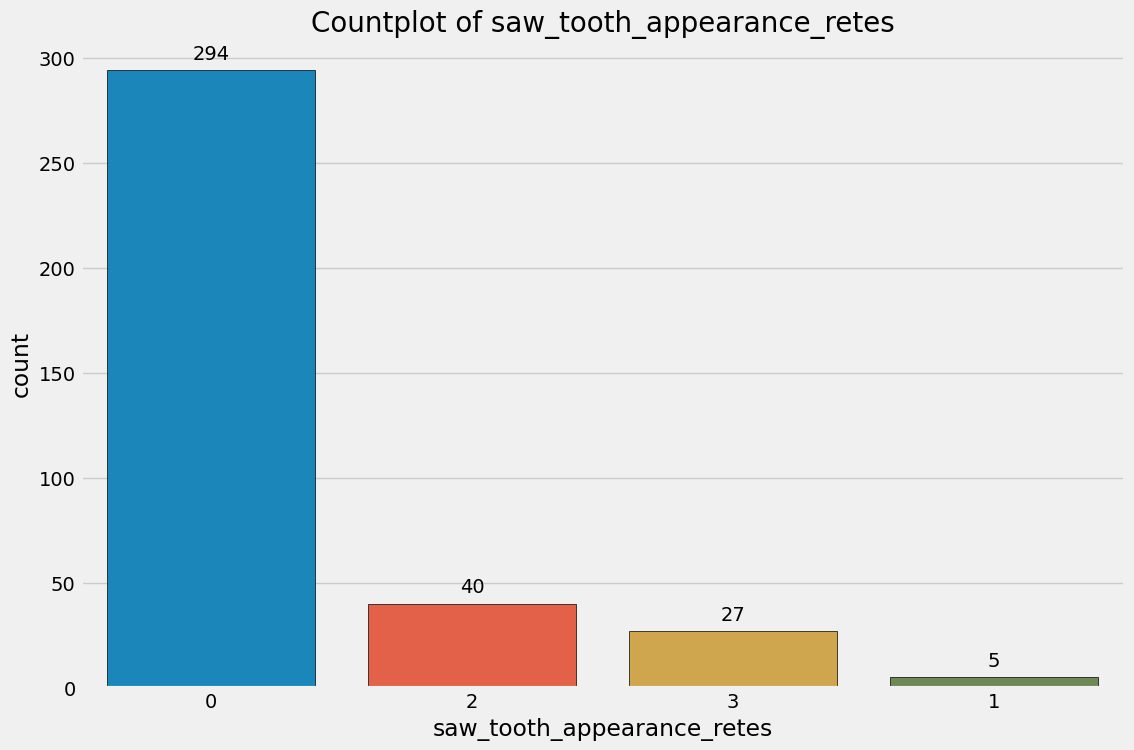

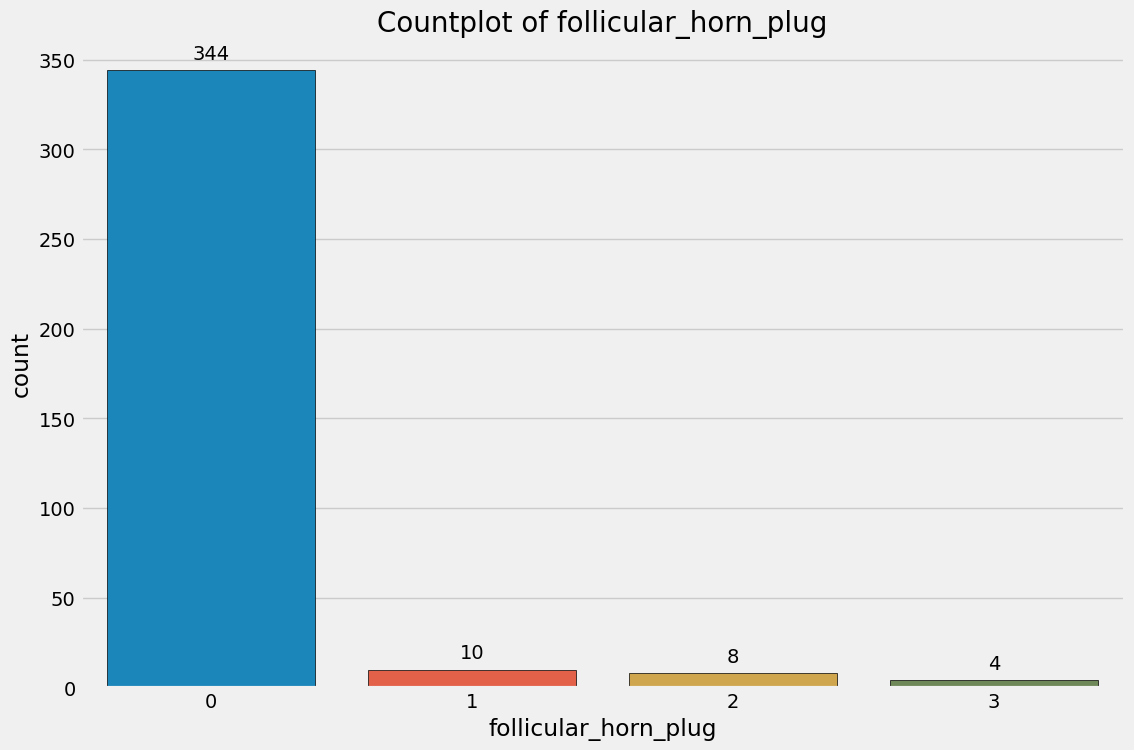

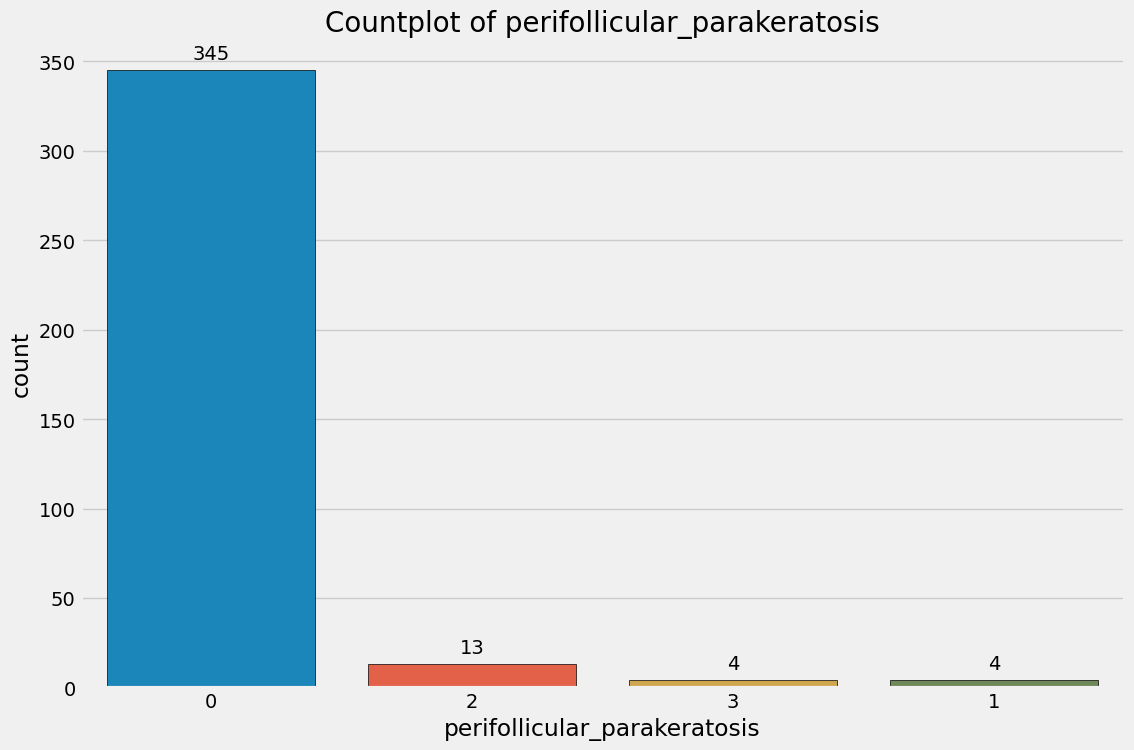

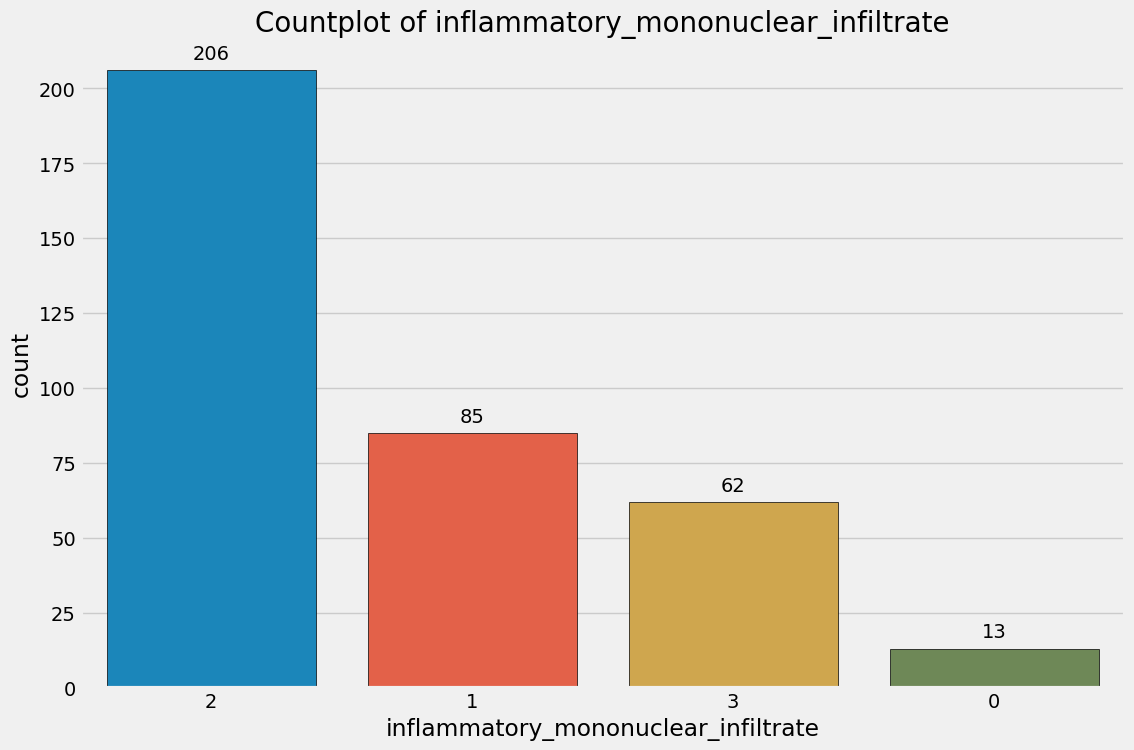

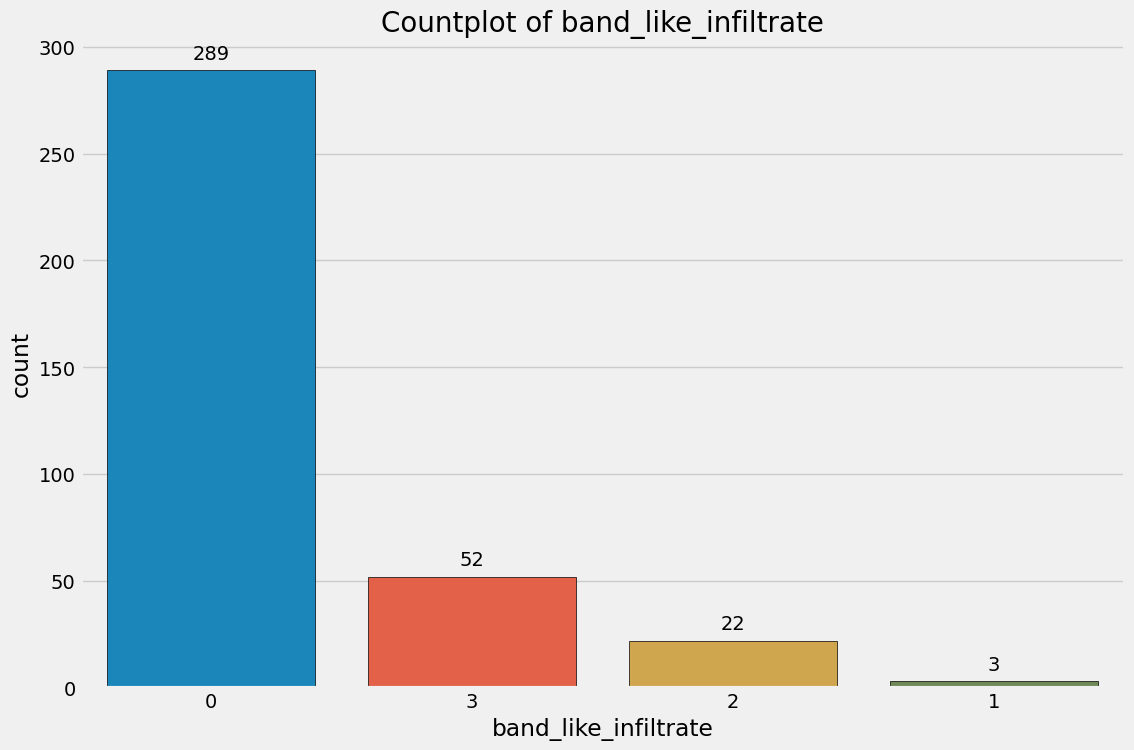

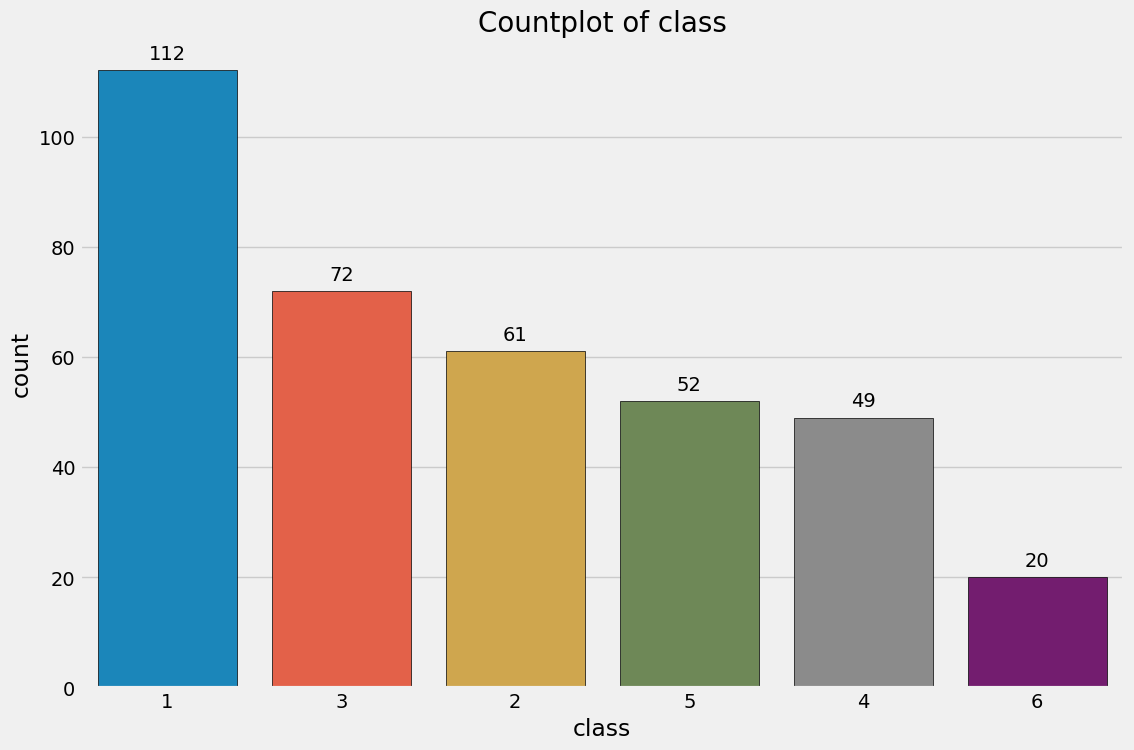

In [13]:
from fasteda import fast_eda
fast_eda(data)

Target looks like classification
Showing only top 10 of 33 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='count', ylabel='class'>,
 [array([[<Axes: xlabel='age_dabl_continuous', ylabel='age_dabl_continuous'>]],
        dtype=object)],
 array([[<Axes: title={'center': 'elongation_rete_ridges'}, xlabel='count', ylabel='elongation_rete_r...'>,
         <Axes: title={'center': 'clubbing_rete_ridges'}, xlabel='count', ylabel='clubbing_rete_ridges'>,
         <Axes: title={'center': 'thinning_suprapapillary_epidermis'}, xlabel='count', ylabel='thinning_suprapap...'>,
         <Axes: title={'center': 'band_like_infiltrate'}, xlabel='count', ylabel='band_like_infiltrate'>,
         <Axes: title={'center': 'saw_tooth_appearance_retes'}, xlabel='count', ylabel='saw_tooth_appeara...'>],
        [<Axes: title={'center': 'vacuolisation_damage_basal_layer'}, xlabel='count', ylabel='vacuolisation_dam...'>,
         <Axes: title={'center': 'melanin_incontinence'}, xlabel='count', ylabel='melanin_incontinence'>,
         <Axes: title={'center': 'foca

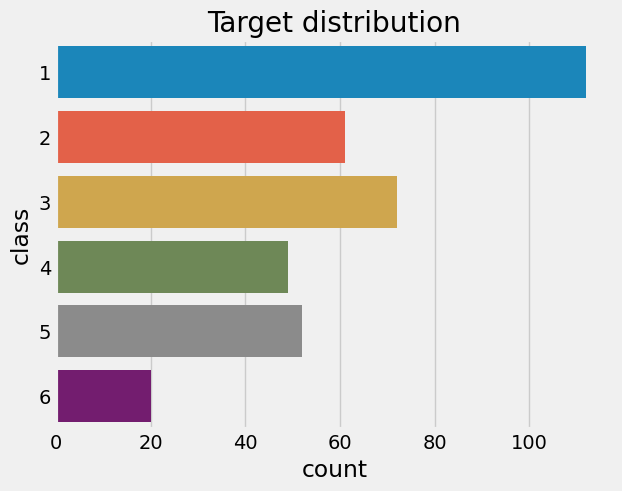

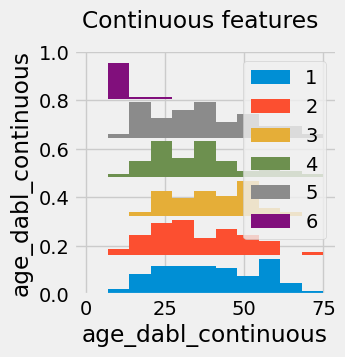

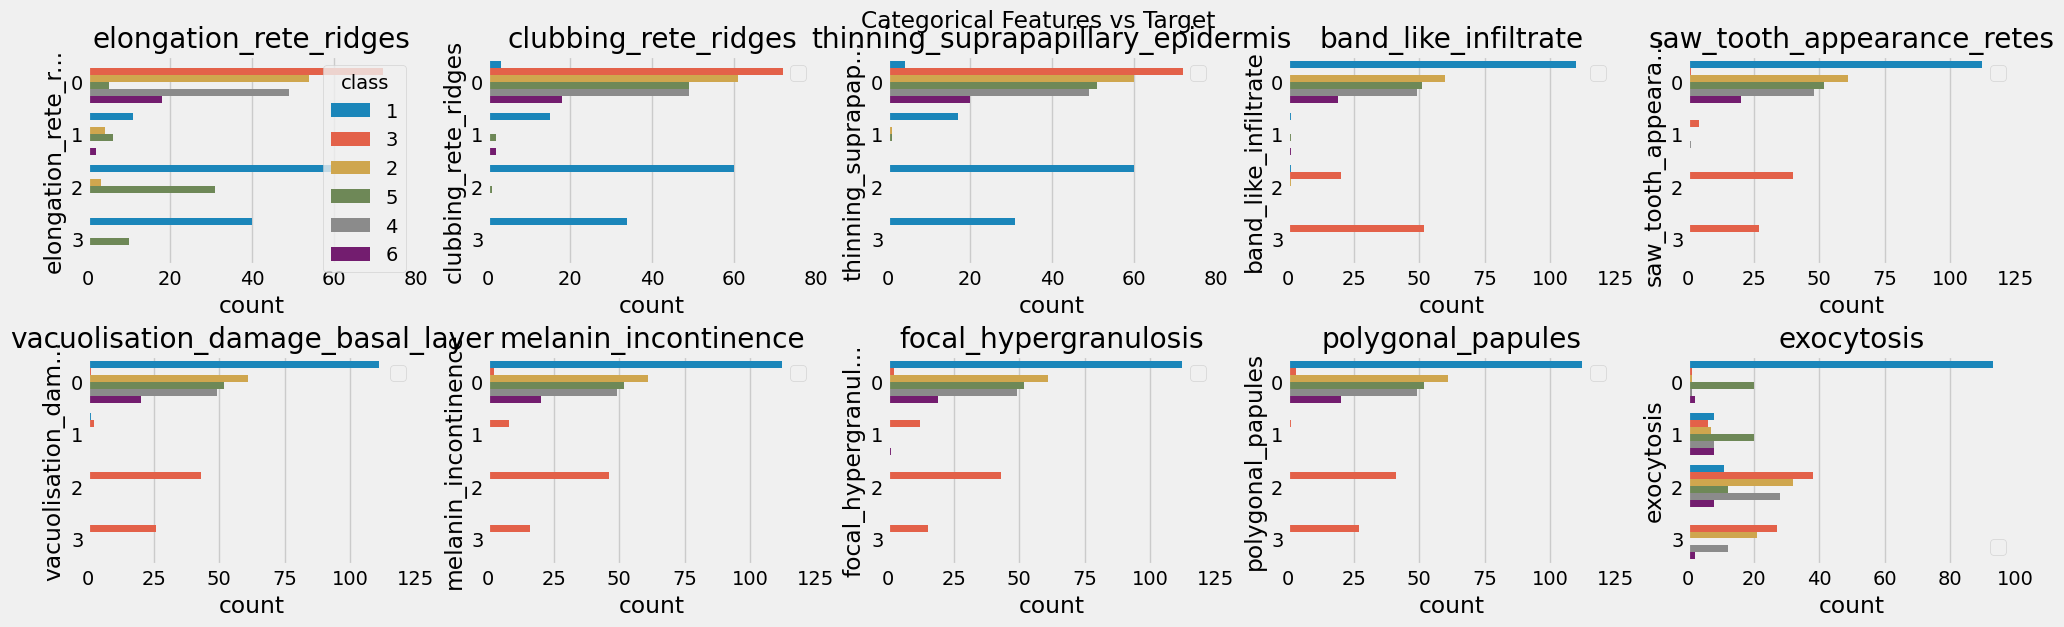

In [14]:
import dabl
dabl.plot(data, target_col='class')

C:\Users\medab\AppData\Local\Temp\ipykernel_9508\2848611582.py:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clinical_attributes_mapped.corr(), cmap='coolwarm', center=0, linewidths=.5)


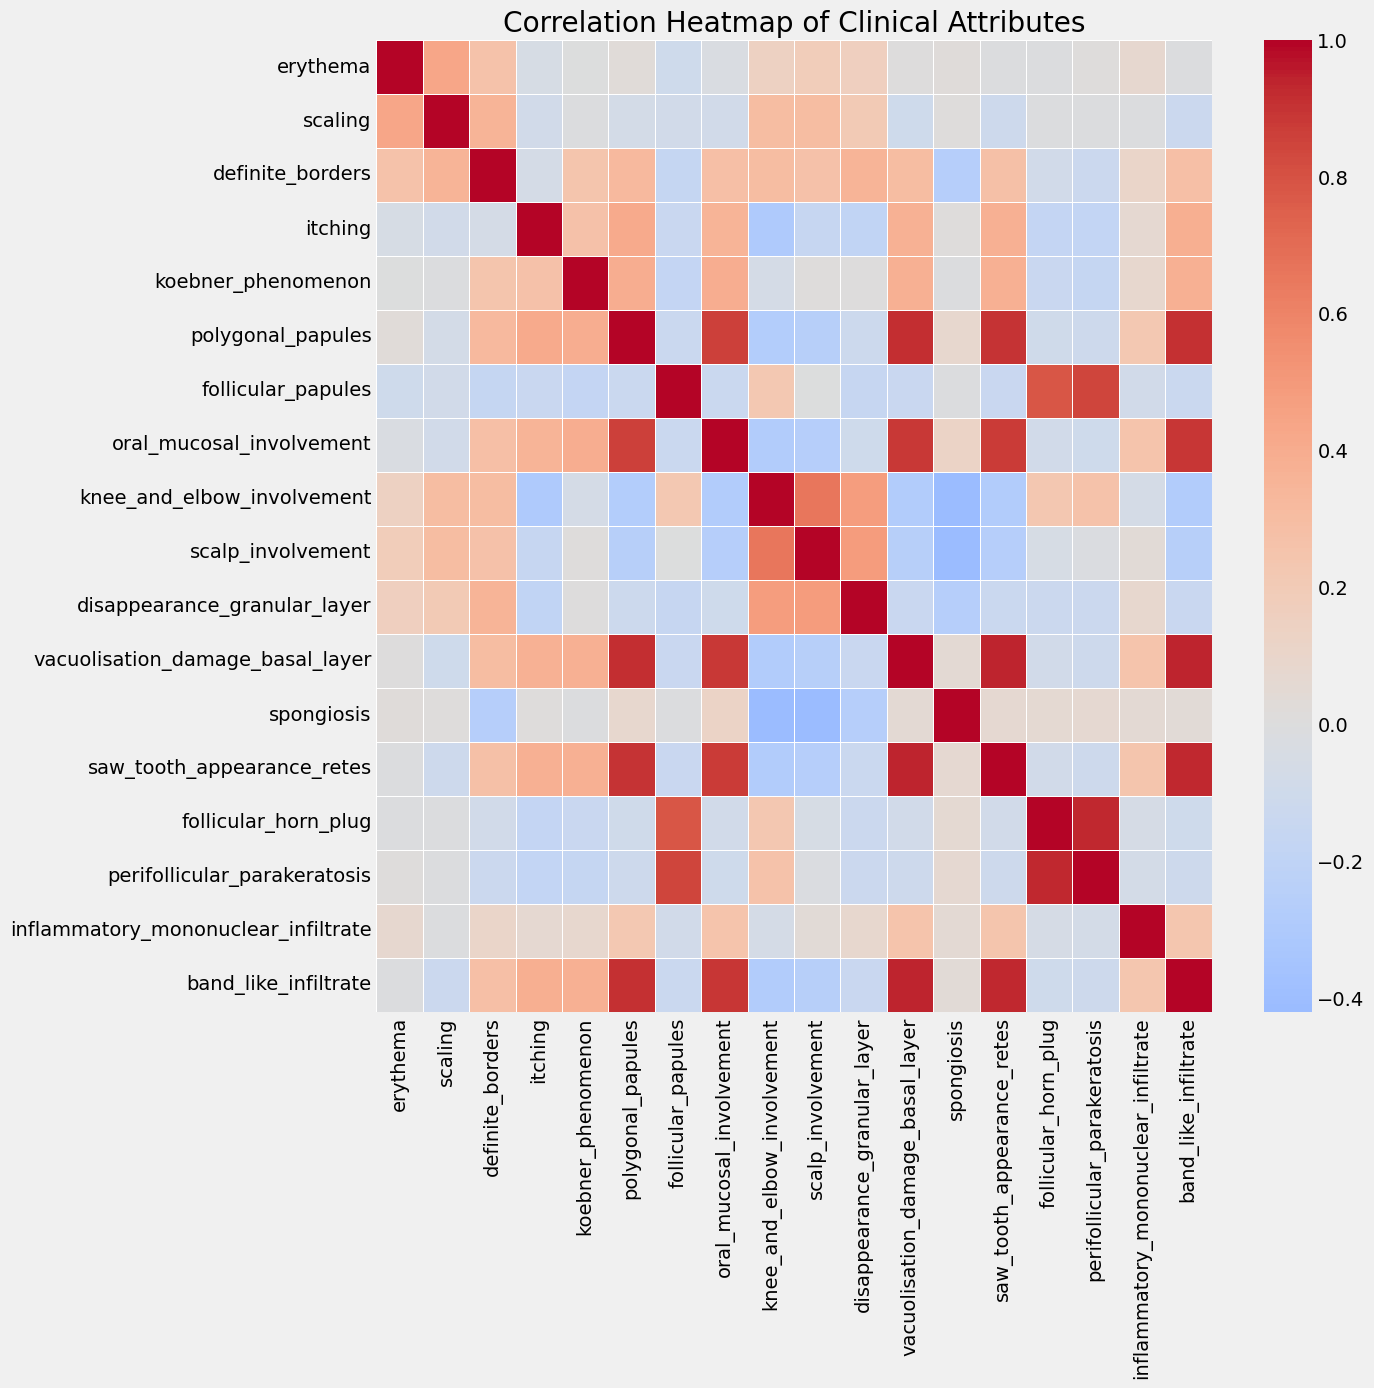

In [15]:
column_names = [
    'erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
    'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
    'knee_and_elbow_involvement', 'scalp_involvement', 'disappearance_granular_layer',
    'vacuolisation_damage_basal_layer', 'spongiosis', 'saw_tooth_appearance_retes',
    'follicular_horn_plug', 'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
    'band_like_infiltrate', 'age', 'class'
]

df = pd.DataFrame(data, columns=column_names)
mapping = {
    0:0,
    1:1,
    2:2,
    3:3
}

clinical_attributes = df.iloc[:, :-2]
clinical_attributes_mapped = clinical_attributes.applymap(lambda x: mapping.get(x, x))
clinical_attributes_mapped['age'] = df['age']

plt.figure(figsize=(12, 12))
sns.heatmap(clinical_attributes_mapped.corr(), cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Heatmap of Clinical Attributes")
plt.show()

c:\Users\medab\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


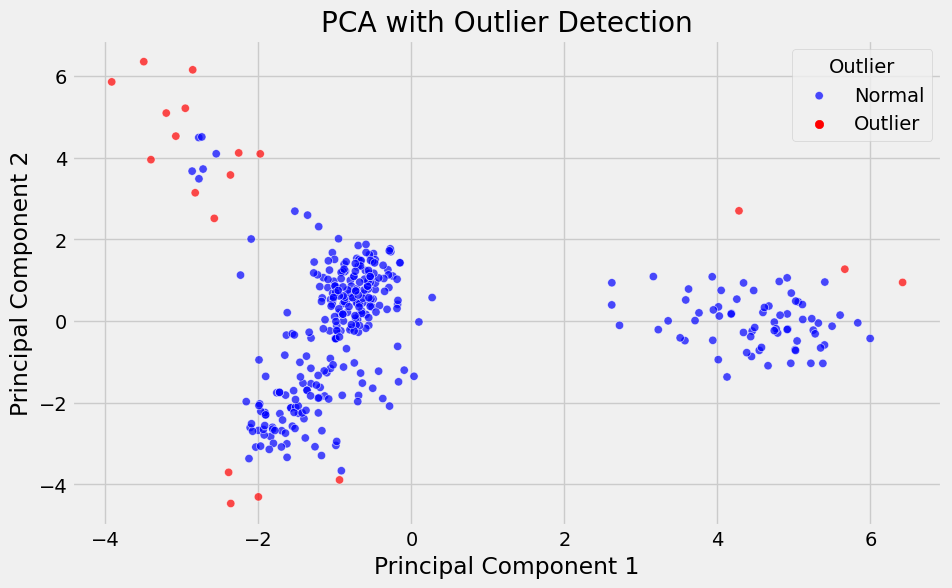

In [16]:
clinical_attributes = df.iloc[:, :-2]  # Exclude 'age' and 'class' columns
clinical_attributes_mapped = clinical_attributes.applymap(lambda x: mapping.get(x, x))

# Standardize the data
scaler = StandardScaler()
clinical_attributes_scaled = scaler.fit_transform(clinical_attributes_mapped)

# Perform Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clinical_attributes_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Outlier detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
outliers = iso_forest.fit_predict(pca_df)

# Add outlier column to PCA DataFrame
pca_df['Outlier'] = outliers

# Seaborn plot for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Outlier', palette={-1: 'red', 1: 'blue'}, alpha=0.7)
plt.title("PCA with Outlier Detection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Outlier', loc='upper right', labels=['Normal', 'Outlier'])
plt.show()

## Feature Engineering

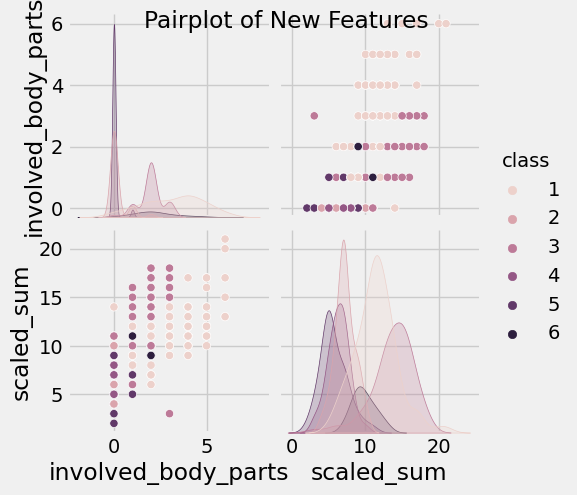

In [17]:
df['involved_body_parts'] = df[
    ['oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement']
].sum(axis=1)

# Calculate the sum of scaled attributes
df['scaled_sum'] = df[
    ['erythema', 'scaling', 'definite_borders', 'itching', 'koebner_phenomenon',
     'polygonal_papules', 'follicular_papules', 'oral_mucosal_involvement',
     'knee_and_elbow_involvement', 'scalp_involvement']
].sum(axis=1)

# Seaborn pairplot to visualize new features
sns.pairplot(data=df, vars=['involved_body_parts', 'scaled_sum'], hue='class', diag_kind='kde')
plt.suptitle("Pairplot of New Features")
plt.show()

## Modeling using logistic regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [23]:
X = clinical_attributes.values
y = df['class'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(x_train_scaled, y_train)
lr_pred = lr_clf.predict(x_test_scaled)

create a function to plot confusion matix

In [37]:
def plot_confusion_matrix(y_true, y_pred, labels):
    conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    plt.figure(figsize=(10, 10))
    sns.heatmap(conf_matrix, annot=True, cbar=False, cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

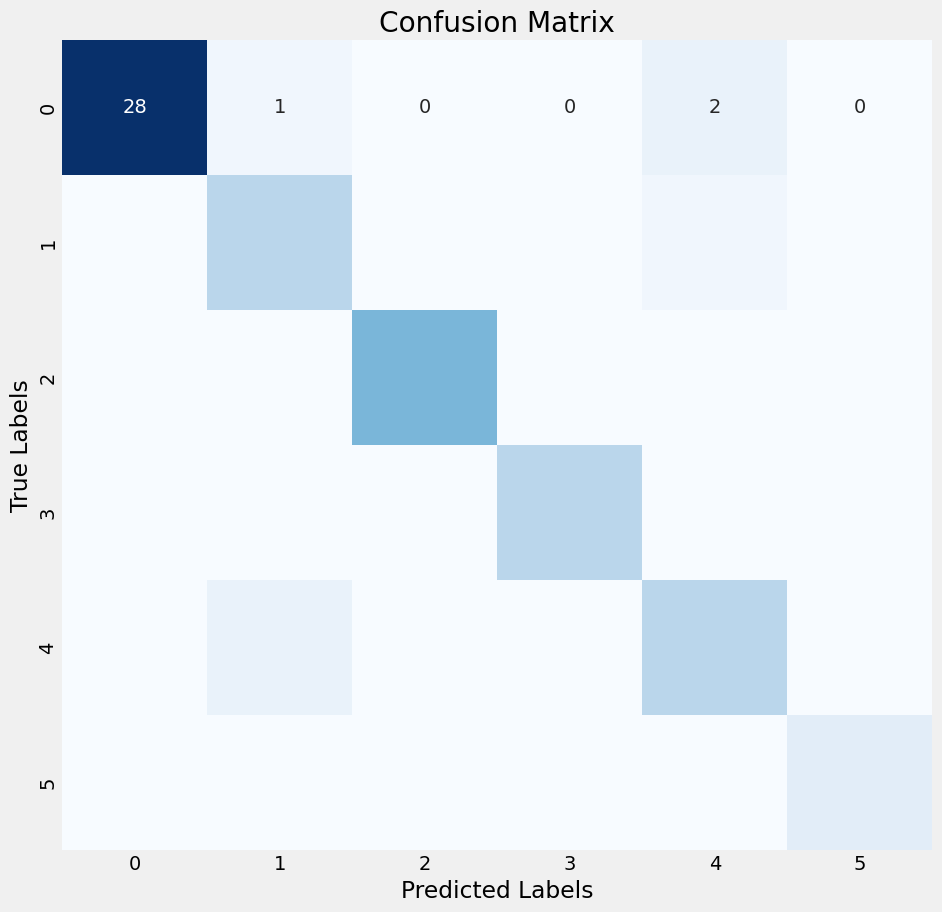

In [38]:
labels = np.unique(y)
plot_confusion_matrix(y_test, lr_pred, labels)

In [39]:
print("Classification Report:")
print(classification_report(y_test, lr_pred, labels=labels))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        31
           2       0.73      0.89      0.80         9
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         8
           5       0.73      0.80      0.76        10
           6       1.00      1.00      1.00         3

    accuracy                           0.92        74
   macro avg       0.91      0.93      0.92        74
weighted avg       0.93      0.92      0.92        74



In [40]:
lr_clf2 = LogisticRegression(solver='sag', random_state=42)
lr_clf2.fit(x_train_scaled, y_train)
lr_pred2 = lr_clf2.predict(x_test_scaled)

c:\Users\medab\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


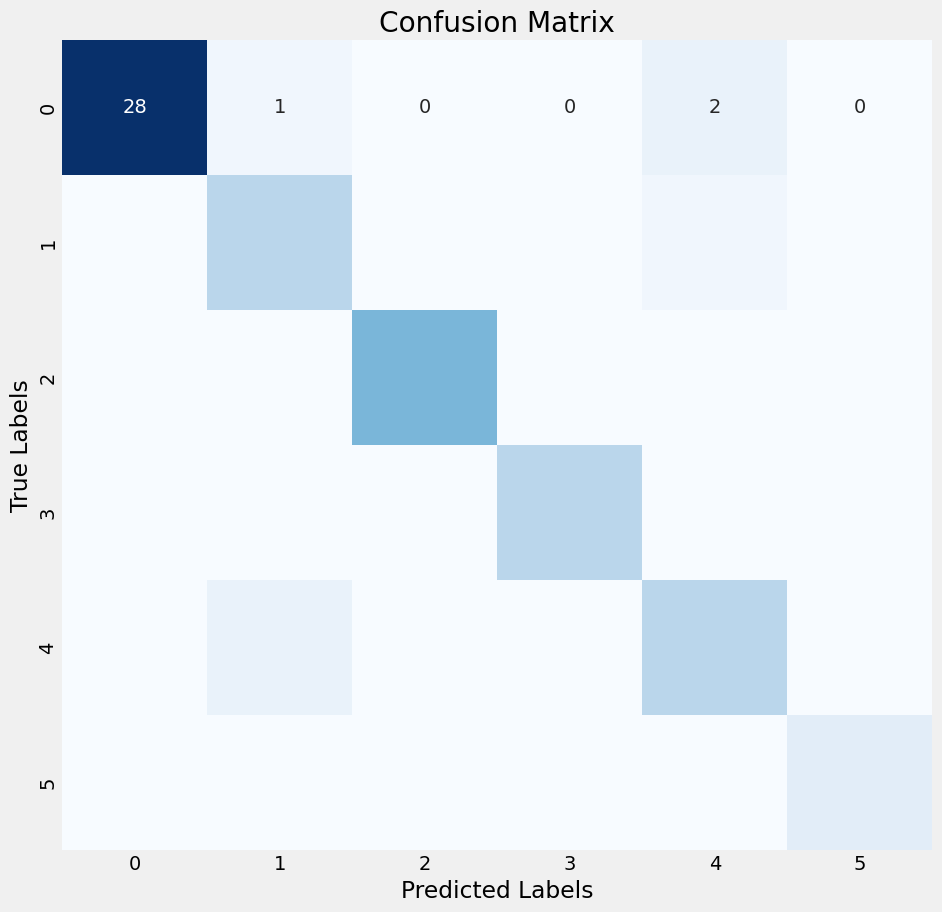

In [41]:
plot_confusion_matrix(y_test, lr_pred2, labels)

In [48]:
print("Classification Report:")
print(classification_report(y_test, lr_pred2, labels=labels))

Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.39      0.35        23
           2       0.09      0.08      0.09        12
           3       0.15      0.13      0.14        15
           4       0.12      0.10      0.11        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4

    accuracy                           0.18        74
   macro avg       0.12      0.12      0.12        74
weighted avg       0.16      0.18      0.17        74



In [44]:
df['class'].value_counts(normalize=True)

1    0.306011
3    0.196721
2    0.166667
5    0.142077
4    0.133880
6    0.054645
Name: class, dtype: float64

In [46]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

In [47]:
lr_clf3 = LogisticRegression(solver='sag', random_state=42)
lr_clf3.fit(x_train_scaled2, y_train2)
lr_pred3 = lr_clf3.predict(x_test_scaled2)

c:\Users\medab\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [50]:
print("Classification Report:")
print(classification_report(y_test2, lr_pred3, labels=labels))

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.91      0.93        23
           2       0.80      0.67      0.73        12
           3       1.00      1.00      1.00        15
           4       0.83      1.00      0.91        10
           5       0.58      0.70      0.64        10
           6       1.00      0.75      0.86         4

    accuracy                           0.86        74
   macro avg       0.86      0.84      0.84        74
weighted avg       0.87      0.86      0.87        74

